In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Importando os dados

In [24]:
df = pd.read_csv('../data/base_de_dados_case.csv').drop('Unnamed: 0',axis=1)
df

,estado,setor,faturamento_informado,divida_total_pj,score,taxa,atraso_corrente,prazo,valor_contrato,valor_contrato_mais_juros,valor_em_aberto
0,SP,ATACADO,400000.0,409000.0,167,4.3470,0,12.6,44633.5995,51828.48,0.00
1,CE,VAREJO,150000.0,18000.0,135,5.1240,0,12.6,8877.6555,10776.72,0.00
2,SP,INDUSTRIA DA CONSTRUCAO,60000.0,0.0,726,4.0635,0,12.6,16645.5975,19063.08,0.00
3,TO,VAREJO,60000.0,116000.0,298,4.6935,0,12.6,16739.0475,19877.28,0.00
4,RJ,VAREJO,1500000.0,1086000.0,525,4.2000,0,12.6,112659.5610,128793.72,0.00
...,...,...,...,...,...,...,...,...,...,...,...
1920,RJ,SERVICOS DE SAUDE,90000.0,0.0,388,5.1765,1291,12.6,11161.4895,13728.48,13728.48
1921,SP,TRANSPORTE,14196.0,25000.0,884,4.4310,0,6.3,2163.8505,2376.42,0.00
1922,SC,VAREJO,75000.0,136000.0,364,4.7145,0,12.6,16645.7970,19791.00,0.00
1923,ES,VAREJO,16000.0,4000.0,109,6.5835,1207,6.3,5408.5185,6241.32,5201.10


# Questão 1

#### Calculo de taxa, ticket e prazo médio

In [8]:
# Ticket médio
ticket_medio = df['valor_contrato'].mean()

# Taxa média ponderada pelo valor do contrato
taxa_media = (df['taxa'] * df['valor_contrato']).sum() / df['valor_contrato'].sum()

# Prazo médio ponderado pelo valor do contrato
# Supondo que o prazo está em anos
prazo_medio = (df['prazo'] * df['valor_contrato']).sum() / df['valor_contrato'].sum()

print(f"Ticket médio: R$ {ticket_medio:,.2f}")
print(f"Taxa média: {taxa_media:.4f}%")
print(f"Prazo médio: {prazo_medio:.2f} anos")


Ticket médio: R$ 24,169.09
Taxa média: 4.4280%
Prazo médio: 11.82 anos


# Questão 2

In [9]:
df['Bad'] = (df['atraso_corrente'] > 180).astype(int)
df_bad = df[df['Bad'] == 1].reset_index(drop=True)
df_good = df[df['Bad'] == 0].reset_index(drop=True)
df

,estado,setor,faturamento_informado,divida_total_pj,score,taxa,atraso_corrente,prazo,valor_contrato,valor_contrato_mais_juros,valor_em_aberto,Bad
0,SP,ATACADO,400000.0,409000.0,167,4.3470,0,12.6,44633.5995,51828.48,0.00,0
1,CE,VAREJO,150000.0,18000.0,135,5.1240,0,12.6,8877.6555,10776.72,0.00,0
2,SP,INDUSTRIA DA CONSTRUCAO,60000.0,0.0,726,4.0635,0,12.6,16645.5975,19063.08,0.00,0
3,TO,VAREJO,60000.0,116000.0,298,4.6935,0,12.6,16739.0475,19877.28,0.00,0
4,RJ,VAREJO,1500000.0,1086000.0,525,4.2000,0,12.6,112659.5610,128793.72,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1920,RJ,SERVICOS DE SAUDE,90000.0,0.0,388,5.1765,1291,12.6,11161.4895,13728.48,13728.48,1
1921,SP,TRANSPORTE,14196.0,25000.0,884,4.4310,0,6.3,2163.8505,2376.42,0.00,0
1922,SC,VAREJO,75000.0,136000.0,364,4.7145,0,12.6,16645.7970,19791.00,0.00,0
1923,ES,VAREJO,16000.0,4000.0,109,6.5835,1207,6.3,5408.5185,6241.32,5201.10,1


#### Plotando as estatisticas dos dataframes

In [10]:
print('Estatisticas dos contratos bons:')
display(df_good.describe().round(2))
print('Estatisticas dos contratos ruins:')
display(df_bad.describe().round(2))

Estatisticas dos contratos bons:


,faturamento_informado,divida_total_pj,score,taxa,atraso_corrente,prazo,valor_contrato,valor_contrato_mais_juros,valor_em_aberto,Bad
count,1424.00,1424.00,1424.00,1424.00,1424.00,1424.00,1424.00,1424.00,1424.00,1424.0
mean,137708.52,144255.15,418.76,4.78,0.99,11.29,24428.63,28454.64,329.72,0.0
std,370848.05,778092.43,182.81,0.63,9.81,3.05,23586.87,27077.41,3094.81,0.0
min,6000.00,0.00,0.00,3.10,0.00,3.15,1067.81,1089.33,0.00,0.0
25%,30000.00,203.50,286.00,4.35,0.00,10.50,10817.13,11934.57,0.00,0.0
50%,57000.00,13000.00,403.50,4.79,0.00,12.60,16646.10,19689.48,0.00,0.0
75%,120000.00,72000.00,534.00,5.14,0.00,12.60,32543.10,34986.27,0.00,0.0
max,7203600.00,21330000.00,997.00,7.06,164.00,25.20,137519.67,164104.20,82816.30,0.0


Estatisticas dos contratos ruins:


,faturamento_informado,divida_total_pj,score,taxa,atraso_corrente,prazo,valor_contrato,valor_contrato_mais_juros,valor_em_aberto,Bad
count,501.00,501.00,501.00,501.00,501.00,501.00,501.00,501.00,501.00,501.0
mean,172764.96,153089.88,365.69,4.86,1131.24,11.33,23431.38,27360.04,16854.75,1.0
std,624390.67,646348.88,171.42,0.66,279.80,2.85,23174.21,26433.81,18224.62,0.0
min,8000.00,0.00,4.00,3.39,189.00,3.15,2135.70,2198.43,0.00,1.0
25%,30000.00,0.00,231.00,4.38,1044.00,12.60,8878.37,11269.32,5306.94,1.0
50%,60850.00,14000.00,353.00,4.89,1165.00,12.60,13320.94,16404.00,11066.01,1.0
75%,136000.00,95000.00,471.00,5.25,1302.00,12.60,32762.70,36216.00,21341.62,1.0
max,11000000.00,11022000.00,988.00,6.94,1767.00,18.90,114643.96,138396.06,137223.36,1.0


#### De inicio , podemos notar uma diferença nas estatísticas de score, mostrando uma tendência de scores mais baixos serem maus pagadores. Além disso, atraso e valor em aberto mostram uma boa distinção,uma vez que para se ter atraso é necessário ter valor em aberto, e o bad é beseado no atraso.

#### Para analisar melhor, vamos plotar a distribuição dos valores do dataframe em relação as categorias de Bad.

In [11]:
## Como algumas análises irão se repetir ao longo do código, vamos criar funções para facilitar a execução

def plot_histograma(df:pd.DataFrame, 
                    coluna_categórica:str, 
                    colunas_numericas:list[str],
                    bins:int=20) -> None:
    """
    Plota um histograma da coluna especificada do DataFrame.
    
    Parâmetros:
    - df (pd.DataFrame): DataFrame contendo os dados.
    - coluna_categórica (str): Coluna categórica usada como `hue` (ex: 'Bad').
    - colunas_numericas (list[str]): Lista de colunas numéricas para plotar.
    - bins (int): Número de bins usados nos histogramas.
    """
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(colunas_numericas):
        plt.subplot(4, 4, i + 1)
        sns.histplot(data=df, x=col, hue=coluna_categórica, kde=True, element='step', stat='density', common_norm=False)
        plt.title(f'Distribuição de {col} por {coluna_categórica}')
        plt.xlabel(col)
        plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

def plot_boxplot(df:pd.DataFrame,
                 coluna_categórica:str, 
                 colunas_numericas:list[str]) -> None:
    """
    Plota um boxplot da coluna especificada do DataFrame.
    
    Parâmetros:
    - df (pd.DataFrame): DataFrame contendo os dados.
    - coluna_categórica (str): Coluna categórica usada para separar os grupos no eixo X.
    - colunas_numericas (list[str]): Lista de colunas numéricas para plotar no eixo Y.
    """
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(colunas_numericas):
        plt.subplot(4, 4, i + 1)
        sns.boxplot(data=df, x=coluna_categórica, y=col)
        plt.title(f'Boxplot de {col} por Bad')
        plt.xlabel(coluna_categórica)
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()

def plot_scatter(df: pd.DataFrame, 
                 coluna_base: str, 
                 colunas_alvo: list[str]) -> None:
    """
    Plota gráficos de dispersão com linha de tendência para cada par (coluna_alvo, coluna_base).

    Parâmetros:
    - df (pd.DataFrame): DataFrame contendo os dados.
    - coluna_base (str): Coluna que será usada no eixo Y.
    - colunas_alvo (list[str]): Lista de colunas para o eixo X.
    """
    plt.figure(figsize=(20, 15))
    for i, coluna_alvo in enumerate(colunas_alvo):
        plt.subplot(4, 4, i + 1)
        sns.scatterplot(data=df, x=coluna_alvo, y=coluna_base, alpha=0.6, s=50)
        sns.regplot(data=df, x=coluna_alvo, y=coluna_base, scatter=False, color='red')
        plt.title(f'{coluna_base} vs {coluna_alvo}')
        plt.xlabel(coluna_alvo)
        plt.ylabel(coluna_base)
    plt.tight_layout()
    plt.show()


def plot_correlacao(df: pd.DataFrame) -> None:
    """
    Plota a matriz de correlação das variáveis numéricas do DataFrame.

    Parâmetros:
    - df (pd.DataFrame): DataFrame contendo os dados.
    """
    # Seleciona apenas colunas numéricas
    df_numerico = df.select_dtypes(include=[np.number])

    # Calcula a matriz de correlação
    corr = df_numerico.corr()

    # Plota o heatmap
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Matriz de Correlação')
    plt.show()



def analise_features_categoricas(df: pd.DataFrame,
                                      colunas_categoricas: list[str],
                                      classe_col: str = 'Bad') -> None:
    """
    Realiza análise de múltiplas variáveis categóricas em relação a uma variável de classe binária (como 'Bad').

    Para cada variável categórica, exibe:
    - Totais por classe
    - Tabela resumo com proporções internas e globais
    - Categorias com alto risco ou alto desempenho (acima da média global + 10%)
    - Gráfico de barras empilhadas das proporções

    Parâmetros:
    ----------
    df : pd.DataFrame
        DataFrame com os dados.
    colunas_categoricas : list
        Lista de colunas categóricas a serem analisadas.
    classe_col : str, default='Bad'
        Nome da variável de classe binária.
    """

    df = df.copy()

    # Criar coluna de região com base no estado, se ainda não existir
    if 'regiao' not in df.columns and 'estado' in df.columns:
        df['regiao'] = df['estado'].map({
            'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
            'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste',
            'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
            'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
            'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
            'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
        })

    # Totais globais
    total_classe = df[classe_col].value_counts()
    total_classe_percent = df[classe_col].value_counts(normalize=True) * 100

    print("📌 Totais globais:")
    print(f"Total Bom Pagador ({classe_col} = 0): {total_classe[0]} ({total_classe_percent[0]:.2f}%)")
    print(f"Total Mau Pagador ({classe_col} = 1): {total_classe[1]} ({total_classe_percent[1]:.2f}%)")

    # Loop nas colunas categóricas
    for col in colunas_categoricas:
        print(f"\n📊 Análise categórica: {col}")

        # Frequência absoluta
        freq_abs = df.groupby([col, classe_col]).size().unstack(fill_value=0)

        # Proporção interna (dentro da categoria)
        freq_prop_interna = freq_abs.div(freq_abs.sum(axis=1), axis=0) * 100

        # Proporção global
        freq_prop_global = pd.DataFrame({
            '% Global Bom Pagador': freq_abs[0] / total_classe[0] * 100,
            '% Global Mau Pagador': freq_abs[1] / total_classe[1] * 100
        })

        # Tabela resumo
        resumo = freq_abs.copy()
        resumo.columns = ['Total Bom Pagador', 'Total Mau Pagador']
        resumo['% Interno Bom Pagador'] = freq_prop_interna[0]
        resumo['% Interno Mau Pagador'] = freq_prop_interna[1]
        resumo['% Global Bom Pagador'] = freq_prop_global['% Global Bom Pagador']
        resumo['% Global Mau Pagador'] = freq_prop_global['% Global Mau Pagador']

        print("\n📌 Resumo por categoria:")
        display(resumo.round(2))

        # Filtros para risco e desempenho
        limite_mau = 1.1 * total_classe_percent[1]
        limite_bom = 1.1 * total_classe_percent[0]

        alto_risco = resumo[resumo['% Interno Mau Pagador'] > limite_mau]
        alto_desempenho = resumo[resumo['% Interno Bom Pagador'] > limite_bom]

        print(f"\n⚠️ Categorias com risco acima da média global ({limite_mau:.2f}%):")
        display(alto_risco.round(2))

        print(f"\n✅ Categorias com desempenho acima da média global ({limite_bom:.2f}%):")
        display(alto_desempenho.round(2))

        # Gráfico
        freq_prop_interna.plot(kind='bar', stacked=True, figsize=(20, 6), colormap='Set2')
        plt.title(f'Proporção (%) de Bom e Mau Pagador por "{col}"')
        plt.ylabel('Proporção (%)')
        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.legend(title='Classe')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()


### Boxplot

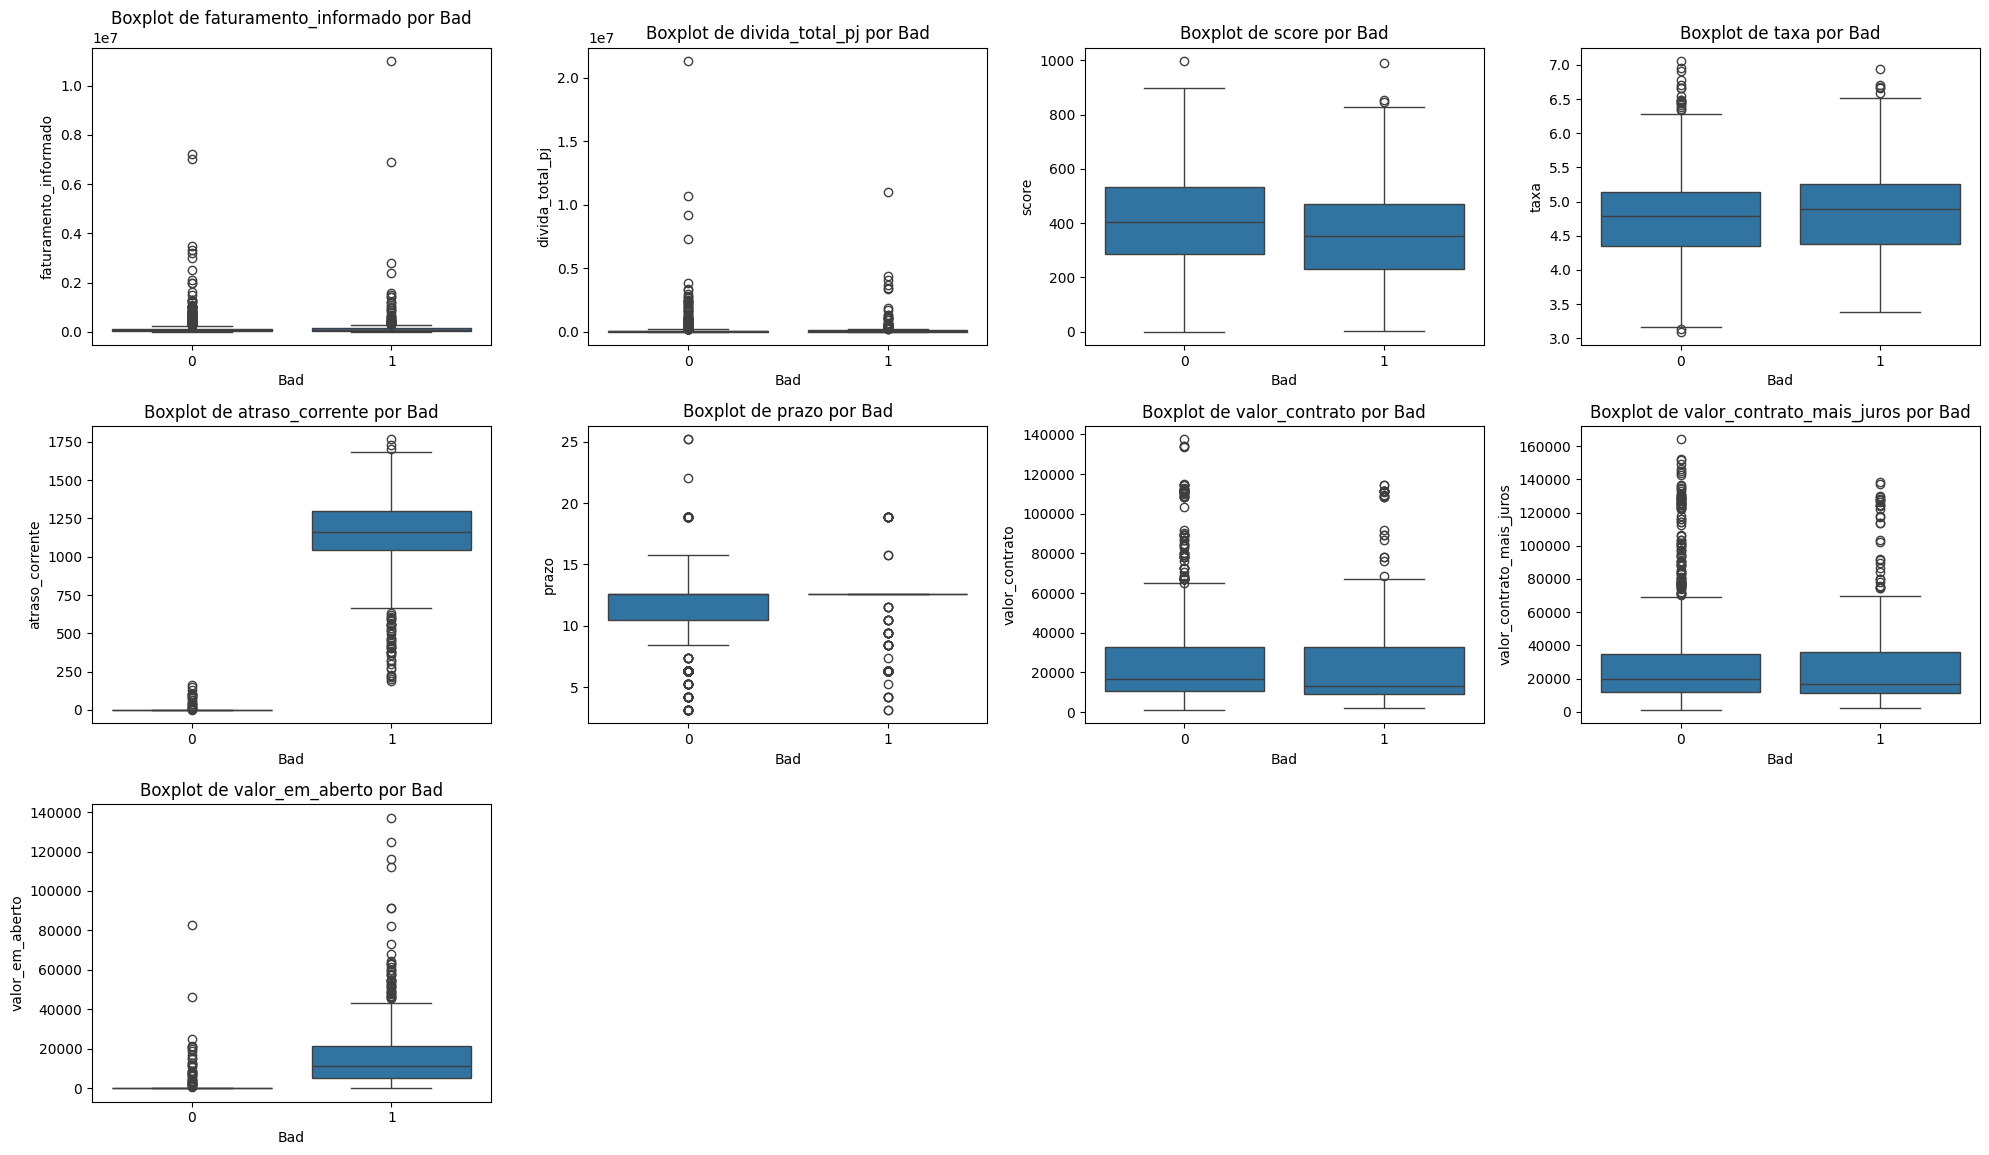

In [12]:
colunas_numericas = df.drop(['setor','estado','Bad'],axis=1).columns.tolist()

plot_boxplot(df, 'Bad', colunas_numericas=colunas_numericas)

### Histogramas

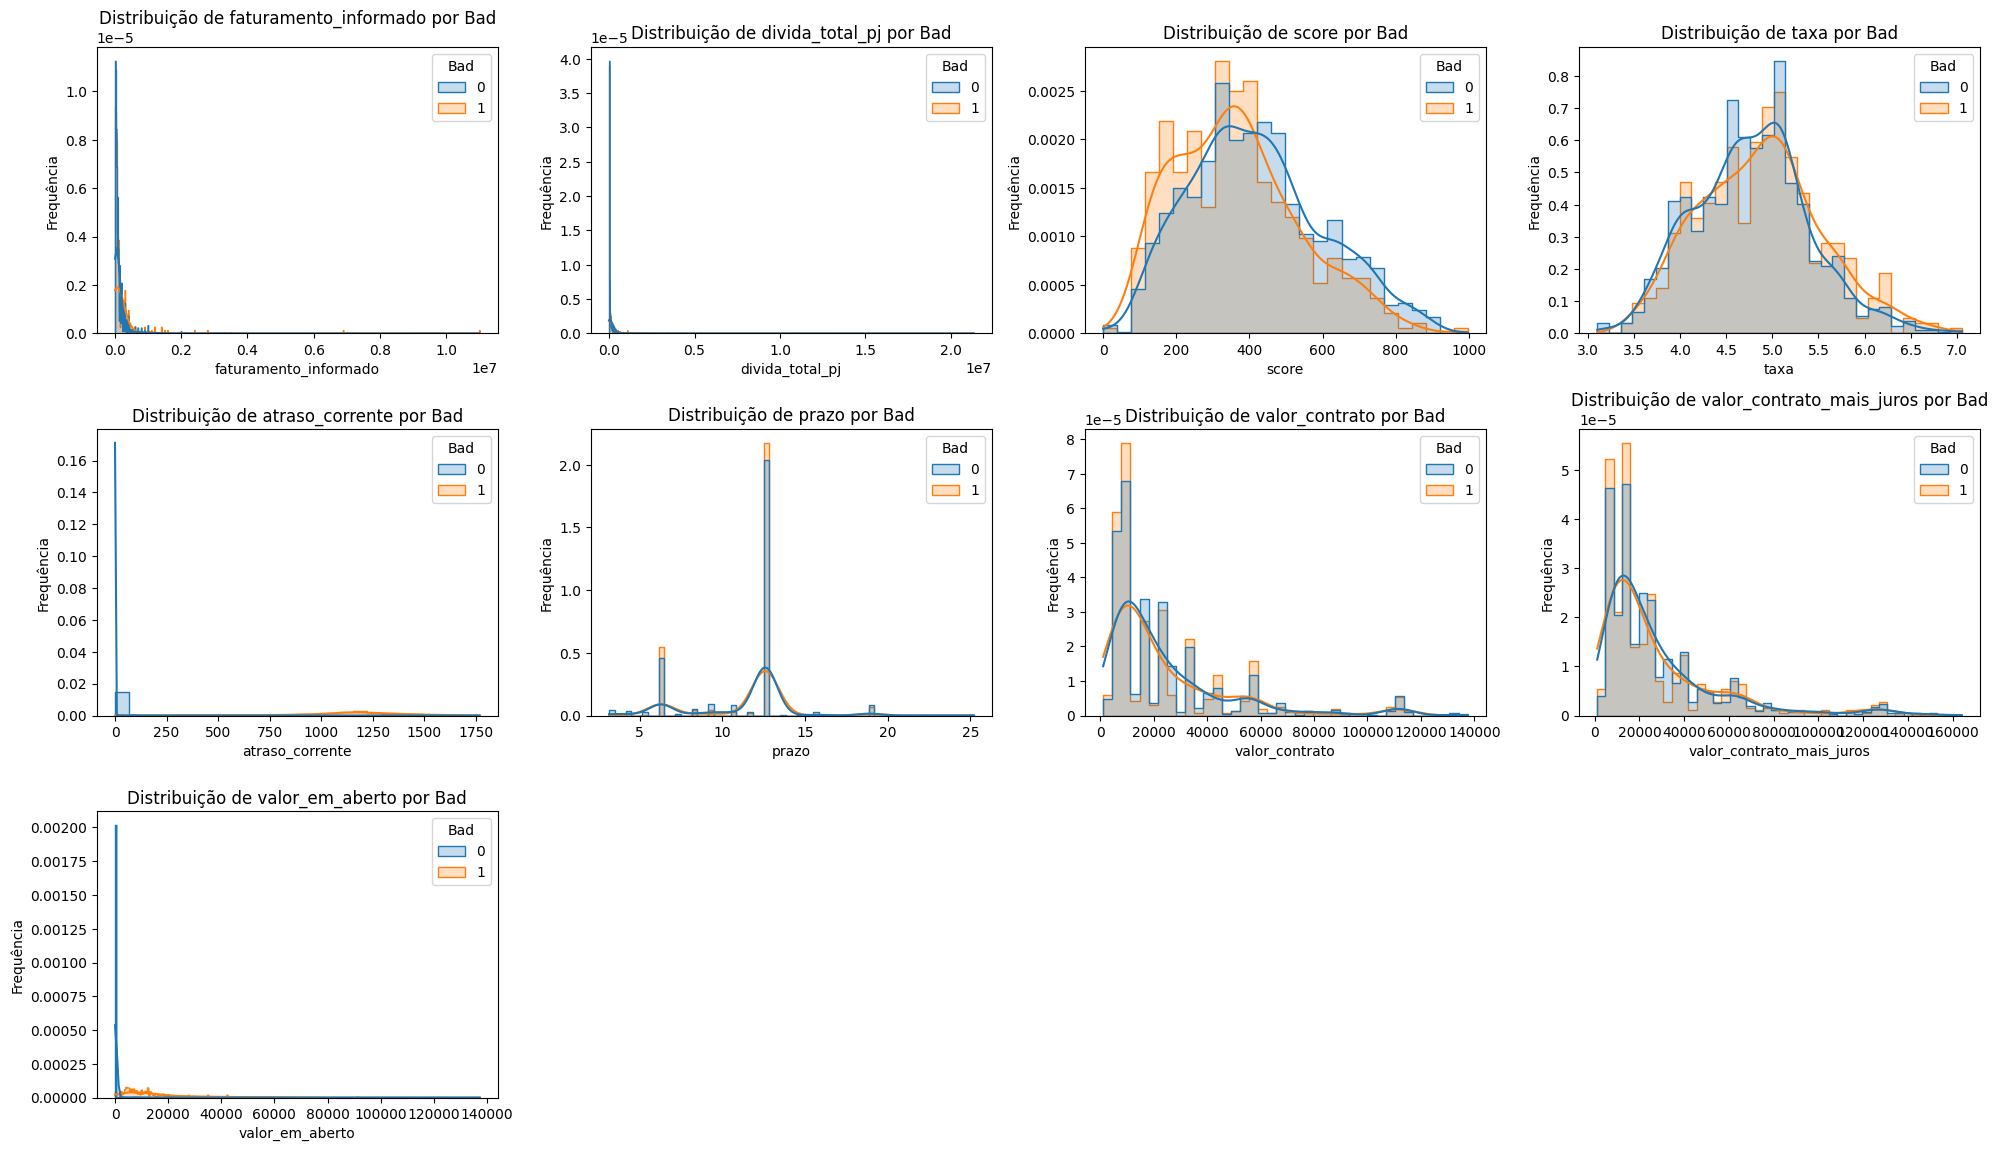

In [13]:
plot_histograma(df, 'Bad', colunas_numericas=colunas_numericas)

### ScatterPlot

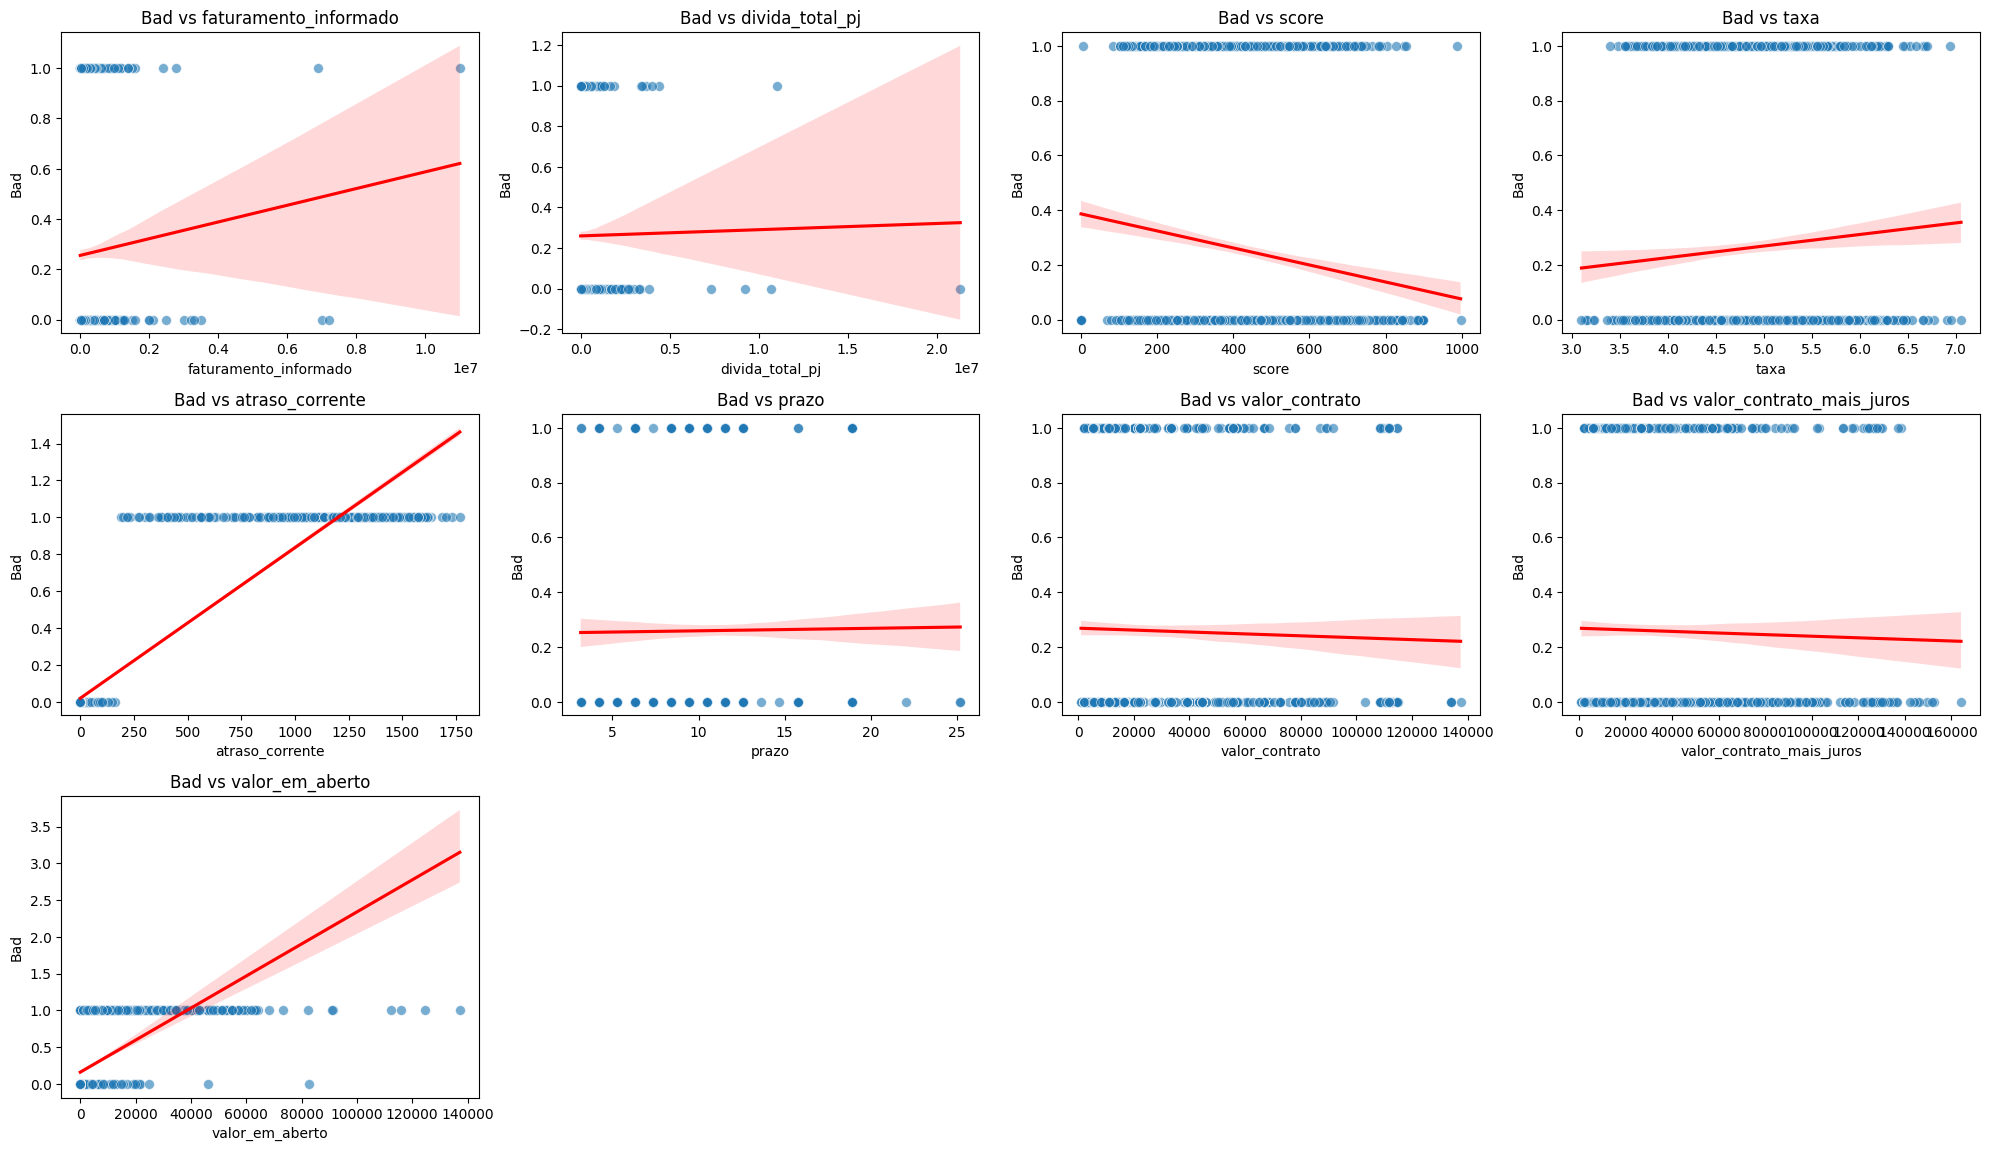

In [14]:
plot_scatter(df, 'Bad', colunas_alvo=colunas_numericas)

### Analisando as features categóricas

📌 Totais globais:
Total Bom Pagador (Bad = 0): 1424 (73.97%)
Total Mau Pagador (Bad = 1): 501 (26.03%)

📊 Análise categórica: estado

📌 Resumo por categoria:


,Total Bom Pagador,Total Mau Pagador,% Interno Bom Pagador,% Interno Mau Pagador,% Global Bom Pagador,% Global Mau Pagador
estado,,,,,,
AC,10,0,100.00,0.00,0.70,0.00
AL,6,2,75.00,25.00,0.42,0.40
AM,30,9,76.92,23.08,2.11,1.80
AP,5,3,62.50,37.50,0.35,0.60
BA,61,23,72.62,27.38,4.28,4.59
CE,40,8,83.33,16.67,2.81,1.60
DF,32,12,72.73,27.27,2.25,2.40
ES,21,10,67.74,32.26,1.47,2.00
GO,49,29,62.82,37.18,3.44,5.79



⚠️ Categorias com risco acima da média global (28.63%):


,Total Bom Pagador,Total Mau Pagador,% Interno Bom Pagador,% Interno Mau Pagador,% Global Bom Pagador,% Global Mau Pagador
estado,,,,,,
AP,5,3,62.50,37.50,0.35,0.60
ES,21,10,67.74,32.26,1.47,2.00
GO,49,29,62.82,37.18,3.44,5.79
MG,94,51,64.83,35.17,6.60,10.18
MS,15,12,55.56,44.44,1.05,2.40
RN,16,9,64.00,36.00,1.12,1.80
RO,5,4,55.56,44.44,0.35,0.80
SC,50,23,68.49,31.51,3.51,4.59
TO,7,6,53.85,46.15,0.49,1.20



✅ Categorias com desempenho acima da média global (81.37%):


,Total Bom Pagador,Total Mau Pagador,% Interno Bom Pagador,% Interno Mau Pagador,% Global Bom Pagador,% Global Mau Pagador
estado,,,,,,
AC,10,0,100.00,0.00,0.70,0.0
CE,40,8,83.33,16.67,2.81,1.6
MT,29,6,82.86,17.14,2.04,1.2
PB,18,3,85.71,14.29,1.26,0.6
PI,14,3,82.35,17.65,0.98,0.6
RR,4,0,100.00,0.00,0.28,0.0
SE,7,1,87.50,12.50,0.49,0.2


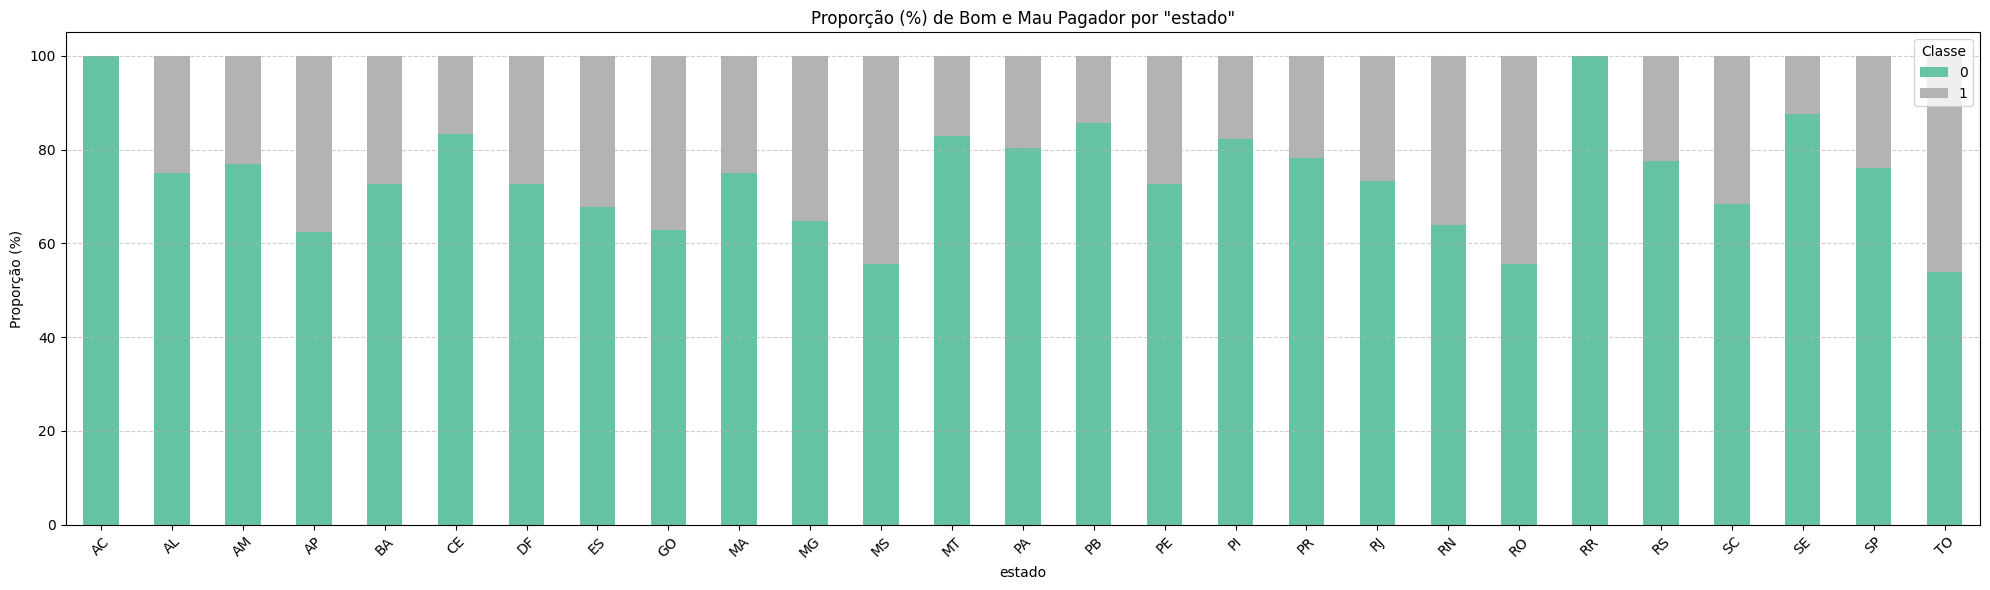


📊 Análise categórica: setor

📌 Resumo por categoria:


,Total Bom Pagador,Total Mau Pagador,% Interno Bom Pagador,% Interno Mau Pagador,% Global Bom Pagador,% Global Mau Pagador
setor,,,,,,
ATACADO,92,40,69.70,30.30,6.46,7.98
BENS DE CAPITAL,7,1,87.50,12.50,0.49,0.20
BENS DE CONSUMO,61,27,69.32,30.68,4.28,5.39
DIVERSOS,7,1,87.50,12.50,0.49,0.20
ELETROELETRONICOS,5,0,100.00,0.00,0.35,0.00
ENERGIA,1,0,100.00,0.00,0.07,0.00
INDUSTRIA AUTOMOTIVA,3,0,100.00,0.00,0.21,0.00
INDUSTRIA DA CONSTRUCAO,62,32,65.96,34.04,4.35,6.39
INDUSTRIA DIGITAL,42,12,77.78,22.22,2.95,2.40



⚠️ Categorias com risco acima da média global (28.63%):


,Total Bom Pagador,Total Mau Pagador,% Interno Bom Pagador,% Interno Mau Pagador,% Global Bom Pagador,% Global Mau Pagador
setor,,,,,,
ATACADO,92,40,69.70,30.30,6.46,7.98
BENS DE CONSUMO,61,27,69.32,30.68,4.28,5.39
INDUSTRIA DA CONSTRUCAO,62,32,65.96,34.04,4.35,6.39
SERVICOS DE ALOJAMENTO/ALIMENTACAO,114,63,64.41,35.59,8.01,12.57
SIDERURGICA-METALURGIA,19,8,70.37,29.63,1.33,1.60



✅ Categorias com desempenho acima da média global (81.37%):


,Total Bom Pagador,Total Mau Pagador,% Interno Bom Pagador,% Interno Mau Pagador,% Global Bom Pagador,% Global Mau Pagador
setor,,,,,,
BENS DE CAPITAL,7,1,87.50,12.50,0.49,0.2
DIVERSOS,7,1,87.50,12.50,0.49,0.2
ELETROELETRONICOS,5,0,100.00,0.00,0.35,0.0
ENERGIA,1,0,100.00,0.00,0.07,0.0
INDUSTRIA AUTOMOTIVA,3,0,100.00,0.00,0.21,0.0
MINERACAO,2,0,100.00,0.00,0.14,0.0
PRODUTOS DE AGROPECUARIA,6,1,85.71,14.29,0.42,0.2
SERVICOS DE SANEAMENTO BASICO,2,0,100.00,0.00,0.14,0.0
SERVICOS DE SAUDE,29,5,85.29,14.71,2.04,1.0


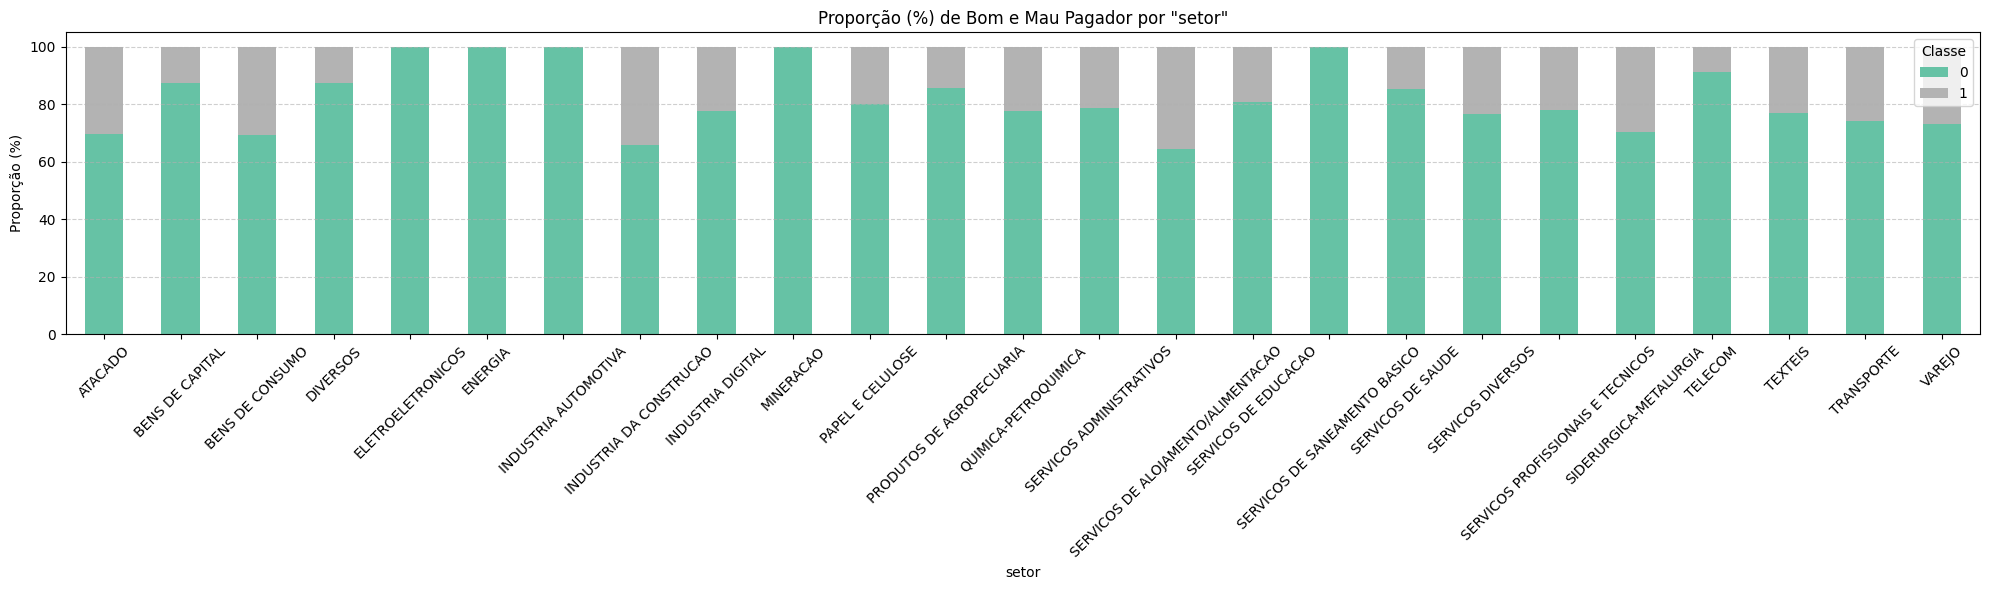


📊 Análise categórica: regiao

📌 Resumo por categoria:


,Total Bom Pagador,Total Mau Pagador,% Interno Bom Pagador,% Interno Mau Pagador,% Global Bom Pagador,% Global Mau Pagador
regiao,,,,,,
Centro-Oeste,125,59,67.93,32.07,8.78,11.78
Nordeste,221,70,75.95,24.05,15.52,13.97
Norte,98,31,75.97,24.03,6.88,6.19
Sudeste,760,270,73.79,26.21,53.37,53.89
Sul,220,71,75.60,24.40,15.45,14.17



⚠️ Categorias com risco acima da média global (28.63%):


,Total Bom Pagador,Total Mau Pagador,% Interno Bom Pagador,% Interno Mau Pagador,% Global Bom Pagador,% Global Mau Pagador
regiao,,,,,,
Centro-Oeste,125,59,67.93,32.07,8.78,11.78



✅ Categorias com desempenho acima da média global (81.37%):


,Total Bom Pagador,Total Mau Pagador,% Interno Bom Pagador,% Interno Mau Pagador,% Global Bom Pagador,% Global Mau Pagador
regiao,,,,,,


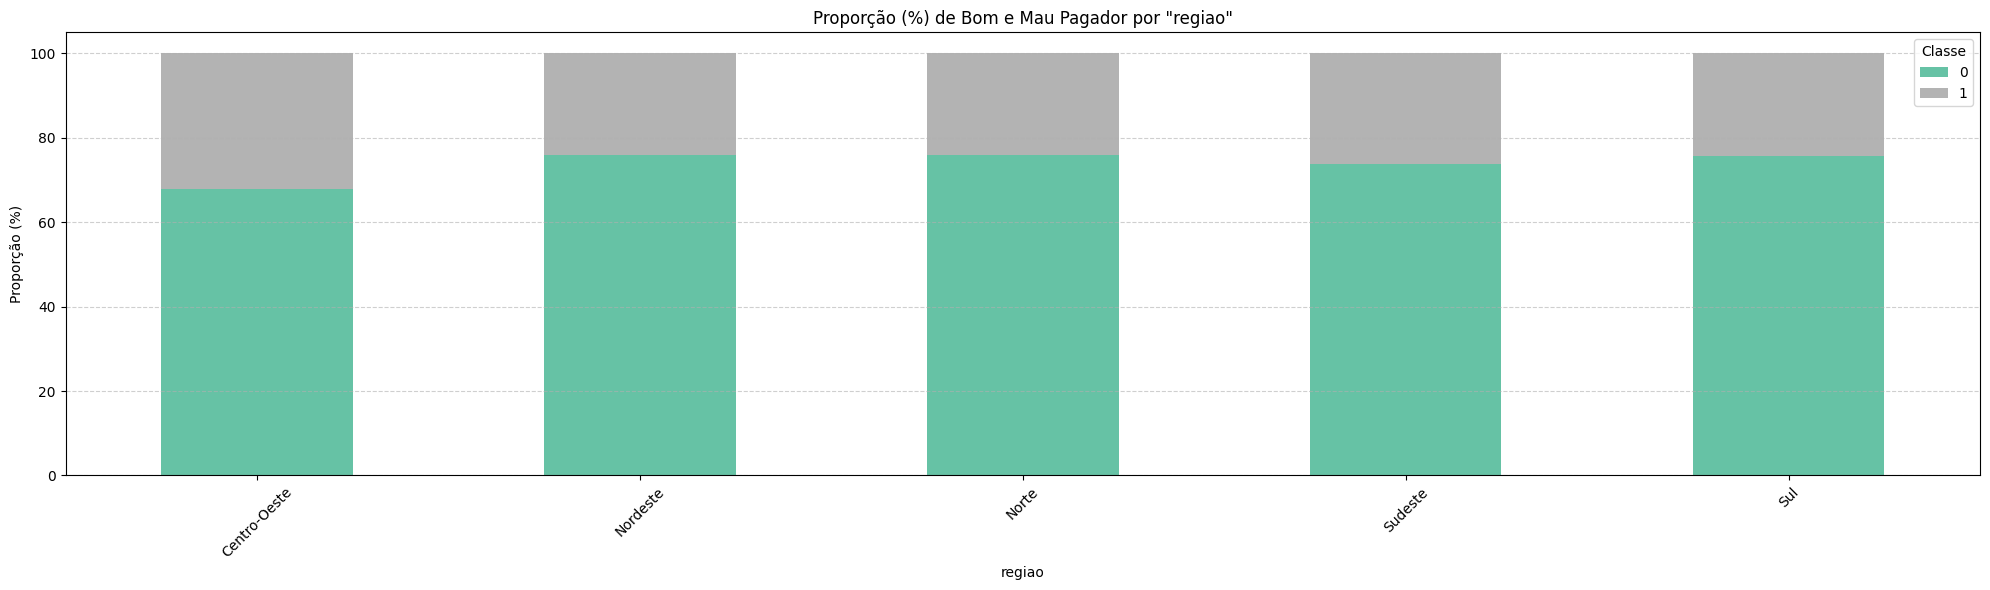

In [15]:
analise_features_categoricas(df, colunas_categoricas=['estado','setor','regiao'], classe_col='Bad')

# Análise de Crédito: Perfil de Bons vs Maus Pagadores


## 📊 Análise Numérica (Variáveis Quantitativas)

**Principais diferenciadores identificados:**

Como a variável `Bad` representa maus pagadores — definidos como clientes com atraso no pagamento —, algumas correlações, como **valor em aberto** e **atraso atual**, são triviais. Esses dados são coletados **após** a concessão do crédito e, portanto, não são úteis para análise preditiva.

Nos gráficos de **boxplot**, **histograma** e **scatterplot**, é possível observar que os maus pagadores tendem a apresentar:

- **Score de crédito mais baixo**
- **Maior faturamento declarado**
- **Taxas mais elevadas**

A análise sugere que, apesar de apresentarem maior faturamento, esses clientes podem ter um perfil de risco elevado, reforçando a importância de considerar múltiplas variáveis na decisão de crédito.

## 📌 Panorama Geral
**Distribuição Global:**
- ✅ **Bons Pagadores (Bad=0):** 1.424 clientes (73.97%)
- ❌ **Maus Pagadores (Bad=1):** 501 clientes (26.03%)

*Inadimplência média global:* 26.03%

## 📍 Análise por Estado (Geografia)

### 🔴 Estados de Alto Risco (Inadimplência > Média Global)
| Estado | % Mau Pagador | Destaque |
|--------|--------------|----------|
| TO | 46.15% | **Maior risco** |
| MS | 44.44% | |
| RO | 44.44% | |
| GO | 37.18% | |
| MG | 35.17% | **Maior volume (51 casos)** |
| SC | 31.51% | |

### 🟢 Estados Exemplares (Inadimplência < 20%)
| Estado | % Mau Pagador | Destaque |
|--------|--------------|----------|
| AC | 0.00% | Perfeito |
| RR | 0.00% | Perfeito |
| SE | 12.50% | |
| PB | 14.29% | |
| CE | 16.67% | |

## 🏭 Análise por Setor Econômico

### 🔴 Setores Problemáticos
| Setor | % Mau Pagador | Destaque |
|-------|--------------|----------|
| Serviços de Alojamento/Alimentação | 35.59% | **Alerta máximo** |
| Indústria da Construção | 34.04% | |
| Atacado | 30.30% | |
| Bens de Consumo | 30.68% | |

### 🟢 Setores Estáveis
| Setor | % Mau Pagador | Destaque |
|-------|--------------|----------|
| Telecomunicações | 8.70% | **Melhor desempenho** |
| Serviços de Saúde | 14.71% | |
| Eletroeletrônicos | 0.00% | Perfeito |
| Energia | 0.00% | Perfeito |

## 🌎 Análise por Região
| Região | % Mau Pagador | Comparativo |
|--------|--------------|-------------|
| Centro-Oeste | 32.07% | **Acima da média** |
| Sudeste | 26.21% | Na média |
| Nordeste | 24.05% | |
| Sul | 24.40% | |
| Norte | 24.03% | |

### Adicionando o Loss

In [16]:
df['Loss'] = df['valor_em_aberto']/df['valor_contrato_mais_juros']
# Vamos adicionar também uma versão categórica da variável Loss
df['Loss_cat'] = pd.cut(df['Loss'], bins=[0,0.2,float('inf')], labels=[0,1],include_lowest=True).astype(int)

## Plotando a correlação

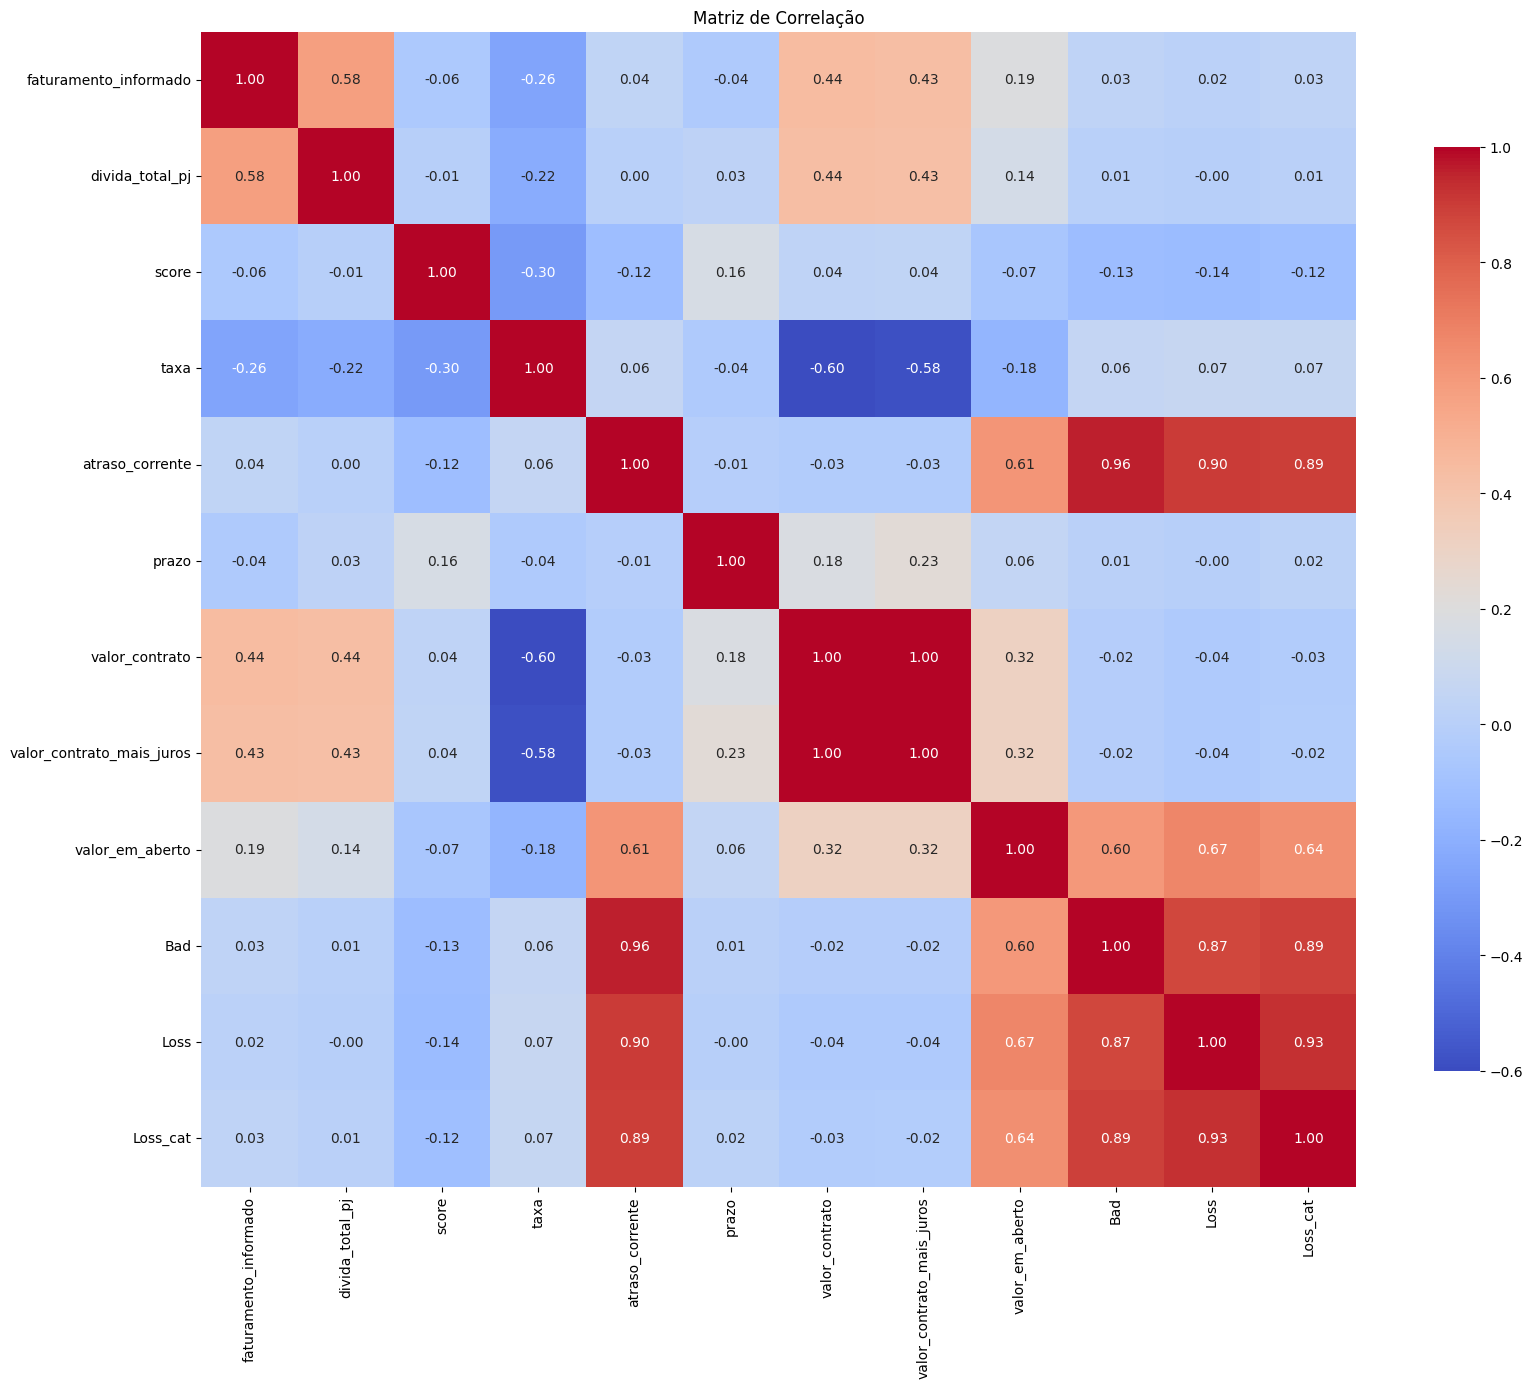

In [17]:
colunas_numericas = df.drop(['setor','estado'],axis=1).columns.tolist()
plot_correlacao(df)

#### O comportamento é esperado, Loss tem bastante correlação com Bad. Agora, vamos ver se a relação dele com as outras métricas permanece igual

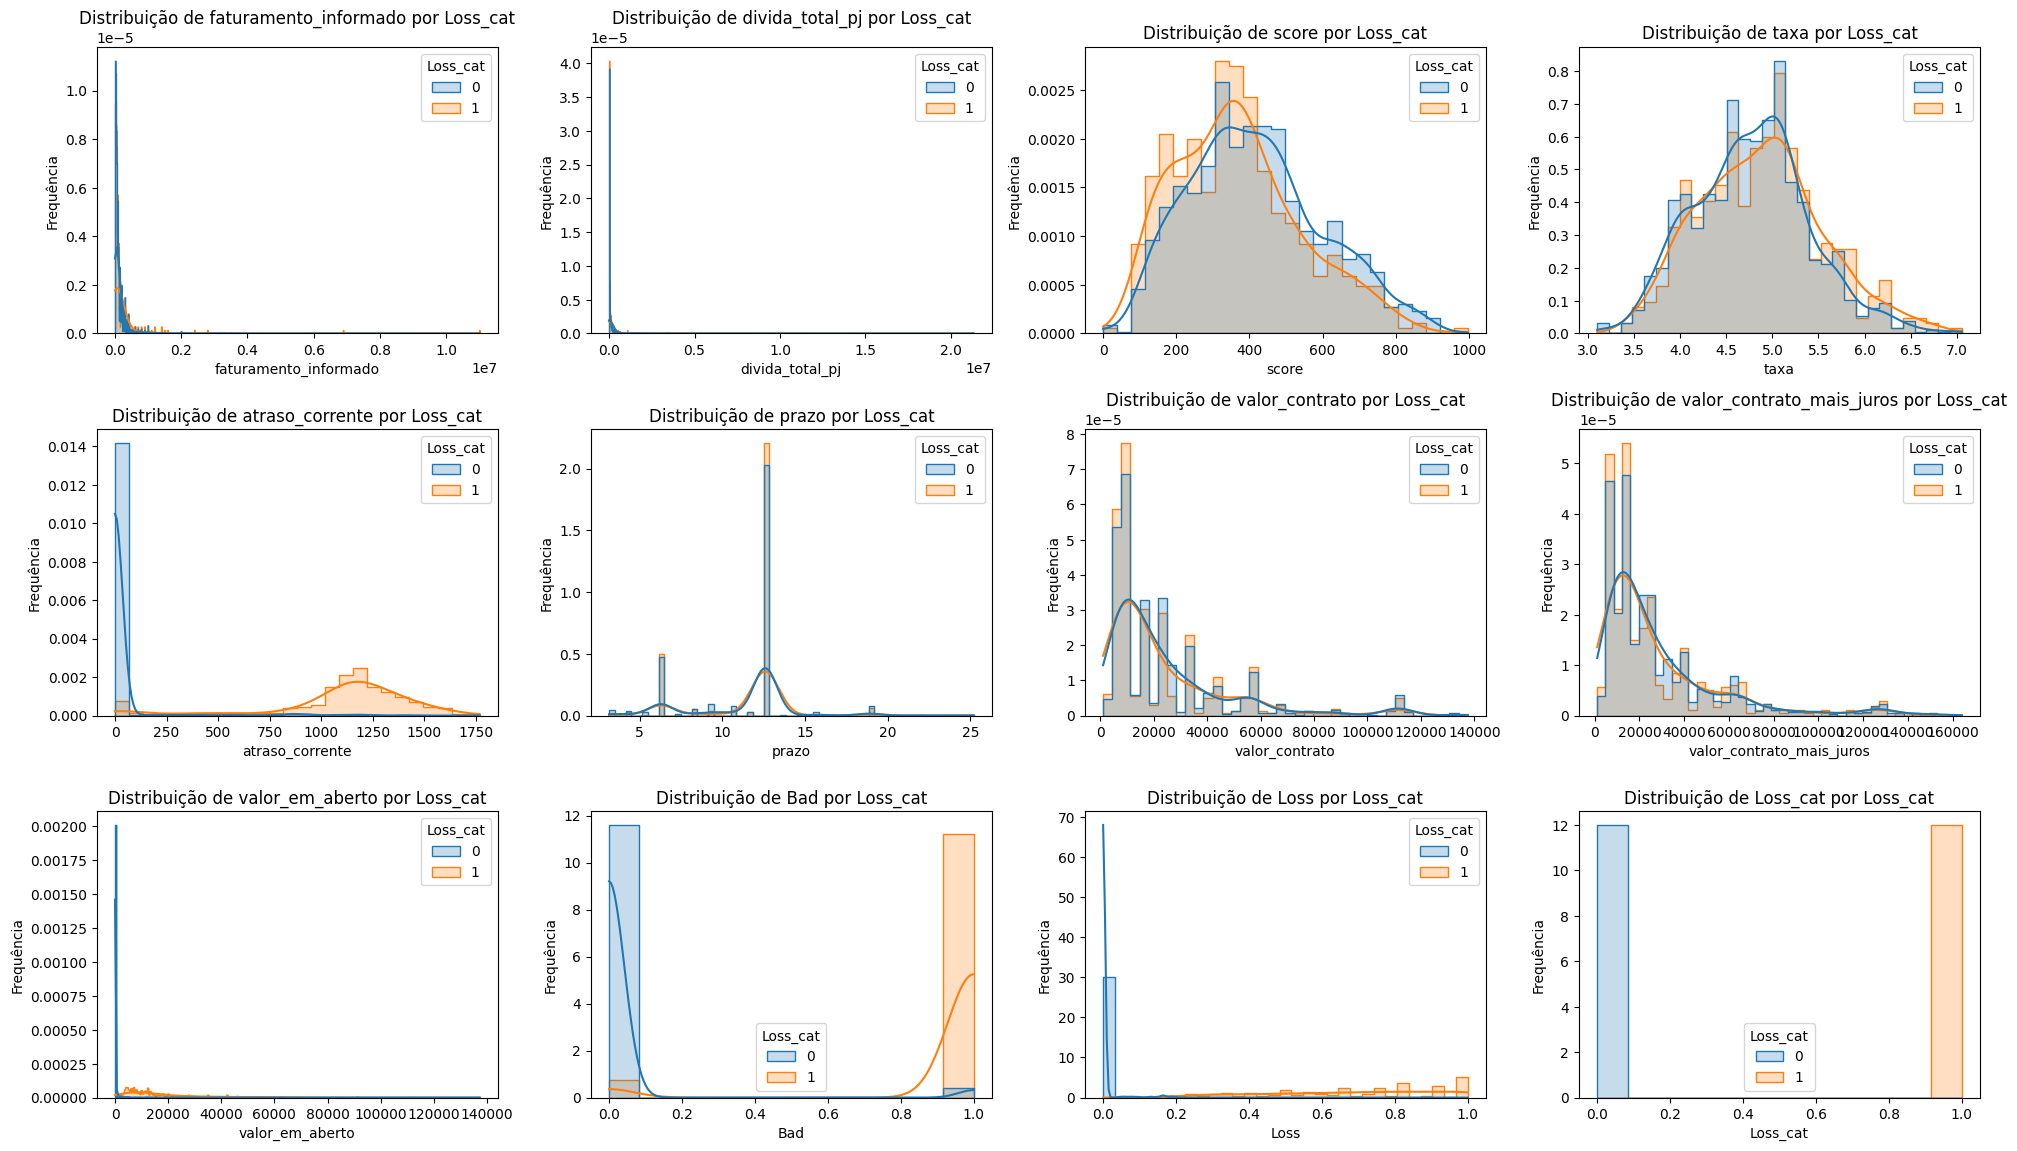

In [18]:
plot_histograma(df, 'Loss_cat', colunas_numericas=colunas_numericas)

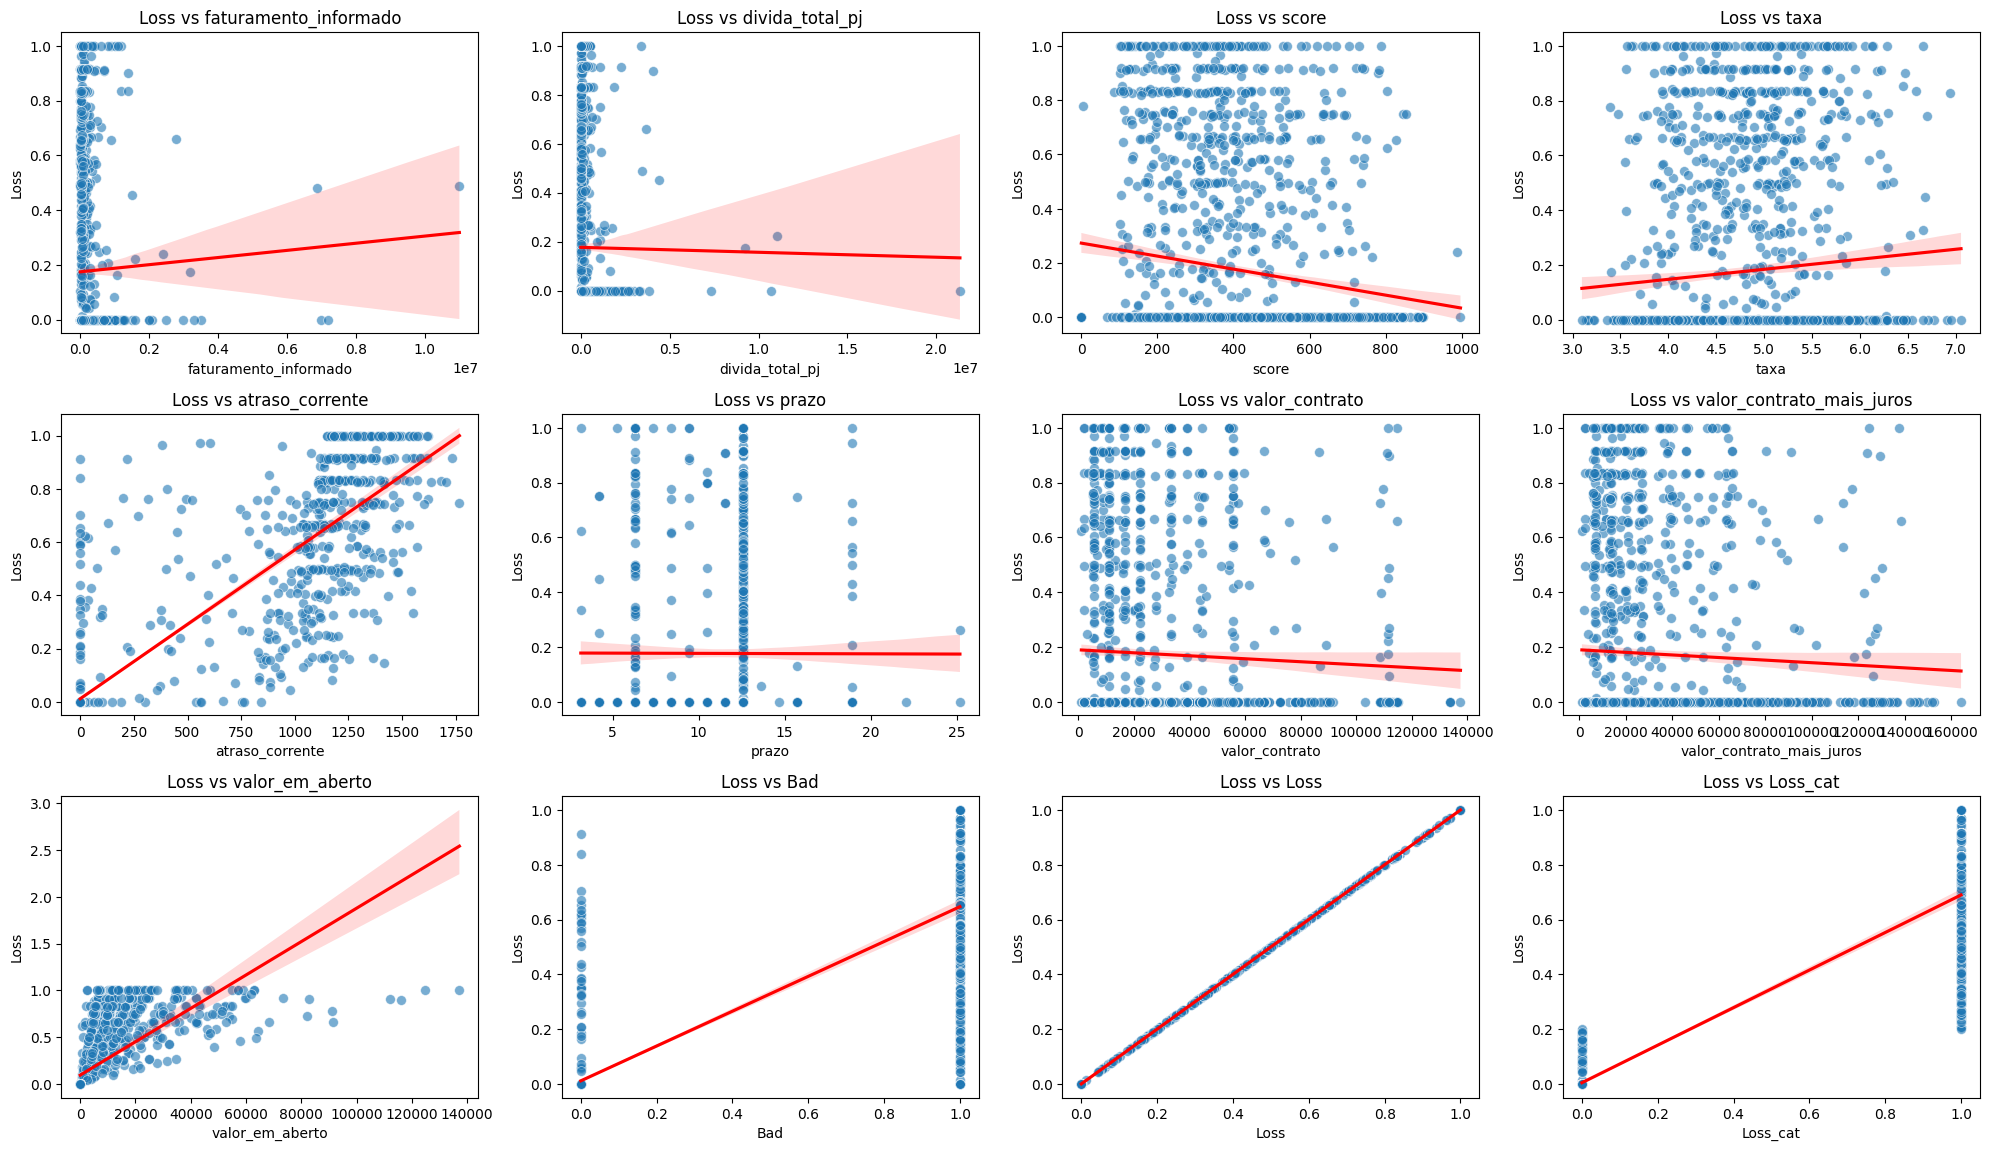

In [19]:
plot_scatter(df, 'Loss', colunas_alvo=colunas_numericas)

📌 Totais globais:
Total Bom Pagador (Loss_cat = 0): 1441 (74.86%)
Total Mau Pagador (Loss_cat = 1): 484 (25.14%)

📊 Análise categórica: estado

📌 Resumo por categoria:


,Total Bom Pagador,Total Mau Pagador,% Interno Bom Pagador,% Interno Mau Pagador,% Global Bom Pagador,% Global Mau Pagador
estado,,,,,,
AC,8,2,80.00,20.00,0.56,0.41
AL,7,1,87.50,12.50,0.49,0.21
AM,30,9,76.92,23.08,2.08,1.86
AP,5,3,62.50,37.50,0.35,0.62
BA,62,22,73.81,26.19,4.30,4.55
CE,38,10,79.17,20.83,2.64,2.07
DF,29,15,65.91,34.09,2.01,3.10
ES,22,9,70.97,29.03,1.53,1.86
GO,51,27,65.38,34.62,3.54,5.58



⚠️ Categorias com risco acima da média global (27.66%):


,Total Bom Pagador,Total Mau Pagador,% Interno Bom Pagador,% Interno Mau Pagador,% Global Bom Pagador,% Global Mau Pagador
estado,,,,,,
AP,5,3,62.50,37.50,0.35,0.62
DF,29,15,65.91,34.09,2.01,3.10
ES,22,9,70.97,29.03,1.53,1.86
GO,51,27,65.38,34.62,3.54,5.58
MG,99,46,68.28,31.72,6.87,9.50
MS,15,12,55.56,44.44,1.04,2.48
PE,31,13,70.45,29.55,2.15,2.69
RN,17,8,68.00,32.00,1.18,1.65
RO,6,3,66.67,33.33,0.42,0.62



✅ Categorias com desempenho acima da média global (82.34%):


,Total Bom Pagador,Total Mau Pagador,% Interno Bom Pagador,% Interno Mau Pagador,% Global Bom Pagador,% Global Mau Pagador
estado,,,,,,
AL,7,1,87.50,12.50,0.49,0.21
MT,30,5,85.71,14.29,2.08,1.03
PA,38,8,82.61,17.39,2.64,1.65
PB,18,3,85.71,14.29,1.25,0.62
PI,14,3,82.35,17.65,0.97,0.62
RR,4,0,100.00,0.00,0.28,0.00
SE,7,1,87.50,12.50,0.49,0.21


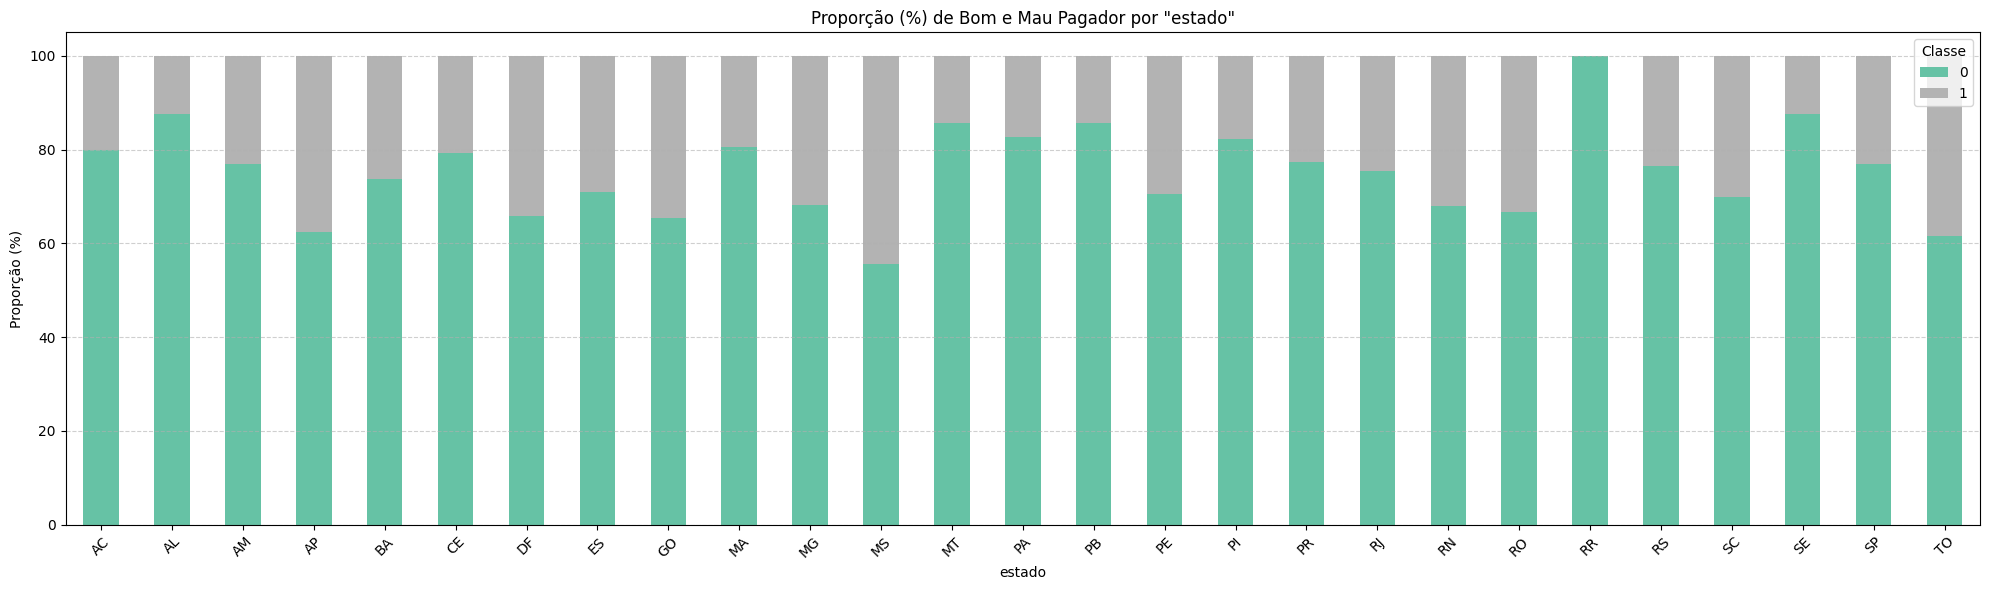


📊 Análise categórica: setor

📌 Resumo por categoria:


,Total Bom Pagador,Total Mau Pagador,% Interno Bom Pagador,% Interno Mau Pagador,% Global Bom Pagador,% Global Mau Pagador
setor,,,,,,
ATACADO,93,39,70.45,29.55,6.45,8.06
BENS DE CAPITAL,7,1,87.50,12.50,0.49,0.21
BENS DE CONSUMO,60,28,68.18,31.82,4.16,5.79
DIVERSOS,6,2,75.00,25.00,0.42,0.41
ELETROELETRONICOS,5,0,100.00,0.00,0.35,0.00
ENERGIA,1,0,100.00,0.00,0.07,0.00
INDUSTRIA AUTOMOTIVA,3,0,100.00,0.00,0.21,0.00
INDUSTRIA DA CONSTRUCAO,63,31,67.02,32.98,4.37,6.40
INDUSTRIA DIGITAL,42,12,77.78,22.22,2.91,2.48



⚠️ Categorias com risco acima da média global (27.66%):


,Total Bom Pagador,Total Mau Pagador,% Interno Bom Pagador,% Interno Mau Pagador,% Global Bom Pagador,% Global Mau Pagador
setor,,,,,,
ATACADO,93,39,70.45,29.55,6.45,8.06
BENS DE CONSUMO,60,28,68.18,31.82,4.16,5.79
INDUSTRIA DA CONSTRUCAO,63,31,67.02,32.98,4.37,6.40
SERVICOS DE ALOJAMENTO/ALIMENTACAO,119,58,67.23,32.77,8.26,11.98
SIDERURGICA-METALURGIA,19,8,70.37,29.63,1.32,1.65



✅ Categorias com desempenho acima da média global (82.34%):


,Total Bom Pagador,Total Mau Pagador,% Interno Bom Pagador,% Interno Mau Pagador,% Global Bom Pagador,% Global Mau Pagador
setor,,,,,,
BENS DE CAPITAL,7,1,87.50,12.50,0.49,0.21
ELETROELETRONICOS,5,0,100.00,0.00,0.35,0.00
ENERGIA,1,0,100.00,0.00,0.07,0.00
INDUSTRIA AUTOMOTIVA,3,0,100.00,0.00,0.21,0.00
MINERACAO,2,0,100.00,0.00,0.14,0.00
PRODUTOS DE AGROPECUARIA,6,1,85.71,14.29,0.42,0.21
QUIMICA-PETROQUIMICA,15,3,83.33,16.67,1.04,0.62
SERVICOS DE EDUCACAO,43,9,82.69,17.31,2.98,1.86
SERVICOS DE SANEAMENTO BASICO,2,0,100.00,0.00,0.14,0.00


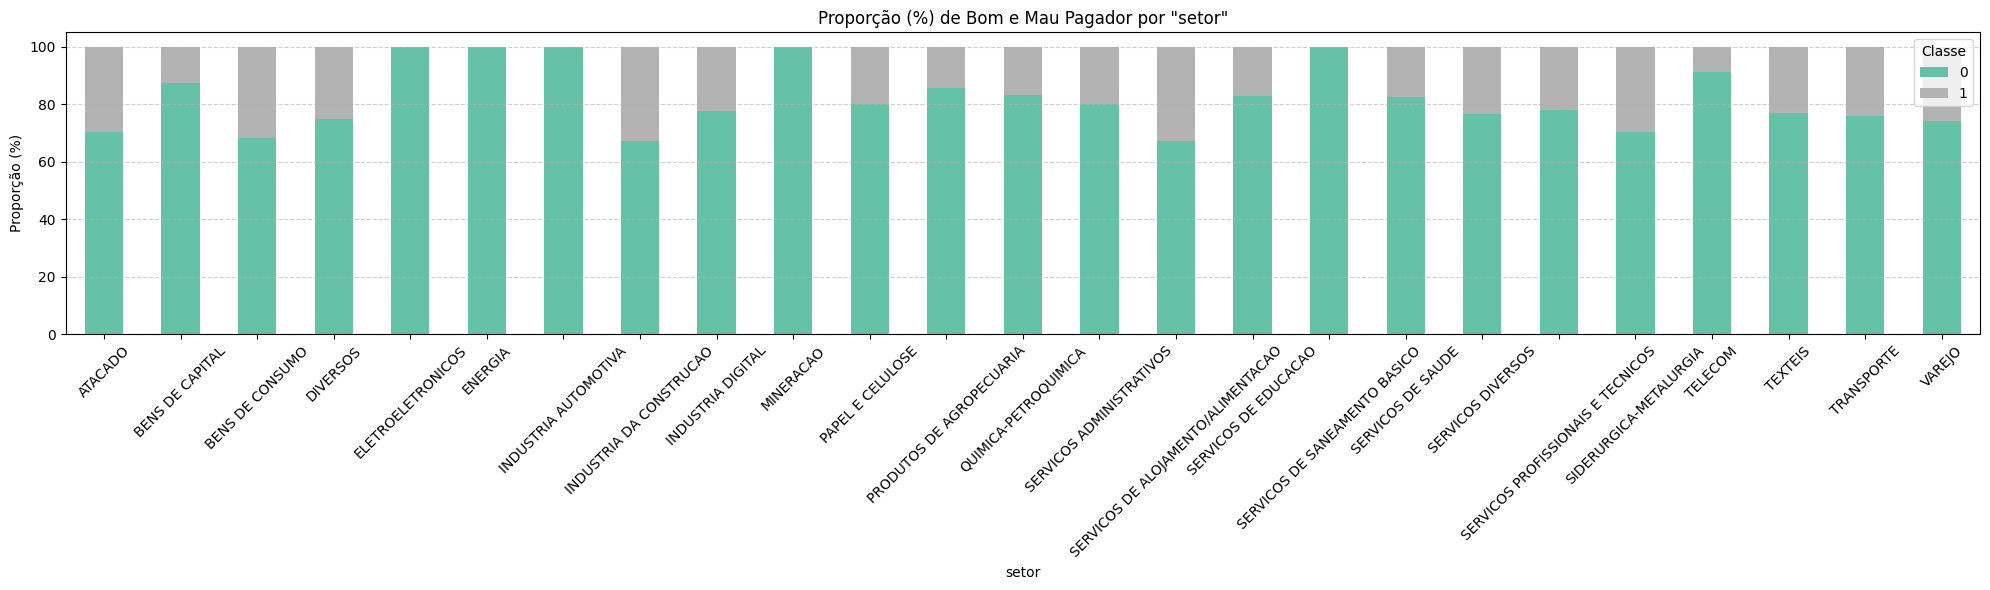


📊 Análise categórica: regiao

📌 Resumo por categoria:


,Total Bom Pagador,Total Mau Pagador,% Interno Bom Pagador,% Interno Mau Pagador,% Global Bom Pagador,% Global Mau Pagador
regiao,,,,,,
Centro-Oeste,125,59,67.93,32.07,8.67,12.19
Nordeste,223,68,76.63,23.37,15.48,14.05
Norte,99,30,76.74,23.26,6.87,6.20
Sudeste,775,255,75.24,24.76,53.78,52.69
Sul,219,72,75.26,24.74,15.20,14.88



⚠️ Categorias com risco acima da média global (27.66%):


,Total Bom Pagador,Total Mau Pagador,% Interno Bom Pagador,% Interno Mau Pagador,% Global Bom Pagador,% Global Mau Pagador
regiao,,,,,,
Centro-Oeste,125,59,67.93,32.07,8.67,12.19



✅ Categorias com desempenho acima da média global (82.34%):


,Total Bom Pagador,Total Mau Pagador,% Interno Bom Pagador,% Interno Mau Pagador,% Global Bom Pagador,% Global Mau Pagador
regiao,,,,,,


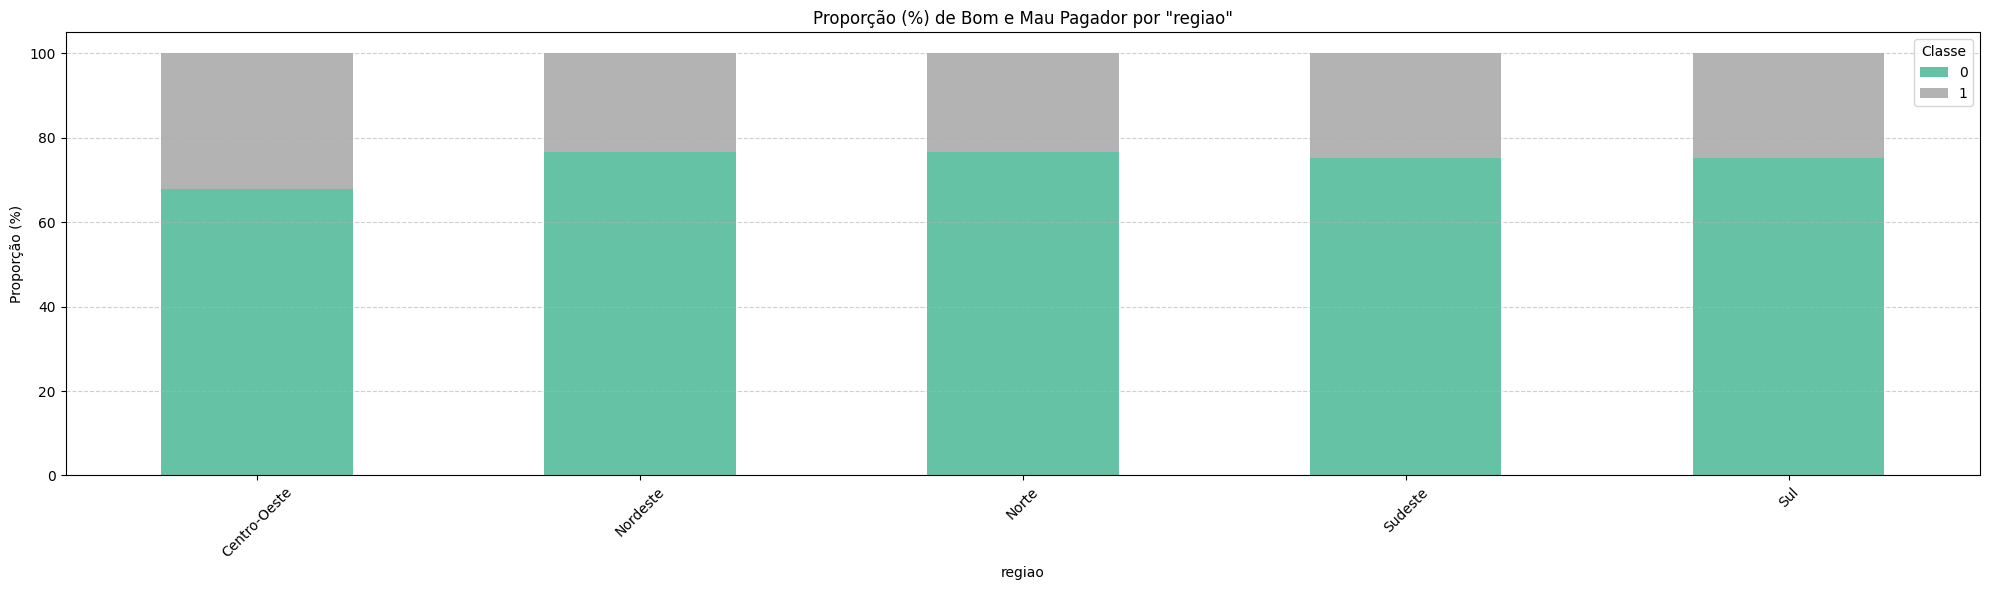

In [20]:
analise_features_categoricas(df, colunas_categoricas=['estado','setor','regiao'], classe_col='Loss_cat')

### Após as análises, podemos concluir que as métricas para bons e maus pagadores com Loss e Bad são bem parecidas, inclusive, ao separar o loss na categoria de <20% e >20%, temos uma distribuição bem parecida com a do Bad, uma vez que Bad e Loss estão fortemente relacionados.




# Questão 3

# Novas Métricas para Análise de Crédito

Para criarmos novas métricas, podemos observar que qualquer tipo de **score que levar em consideração o atraso ou o valor atrasado** será extremamente correlacionado com **Bad** e **Loss**, uma vez que essas variáveis são intimamente ligadas. 

Por isso, irei tentar encontrar métricas que, assim como o score, possam ser avaliadas **no momento da concessão do crédito**.

---

### Exemplos de Métricas Propostas:

- **Razão Valor_contrato / Faturamento:**  
Essa métrica avalia o quanto o valor do contrato é relevante em relação ao faturamento declarado da empresa. Dessa forma, podemos estimar o impacto do contrato e de eventual inadimplência para a empresa.

- **Razão valor_aberto / prazo** e **Razão atraso / prazo:**  
Ambas as métricas têm o objetivo de mostrar que qualquer métrica que considere **valor** e **atraso** tende a performar bem na análise.



In [21]:
def create_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Cria novas features a partir das existentes no DataFrame.

    Parâmetros:
    ----------
    df : pd.DataFrame
        DataFrame com os dados originais.

    Retorna:
    -------
    pd.DataFrame
        DataFrame com as novas features adicionadas.
    """
    df = df.copy()

    df['ratio_contrato_faturamento'] = df['valor_contrato_mais_juros'] / df['faturamento_informado']
    df['ratio_contrato_faturamento_cat'] = pd.cut(df['ratio_contrato_faturamento'], bins=[0,0.25,float('inf')], labels=[0,1],include_lowest=True).astype(int)
    df['ratio_valor_prazo'] = df['valor_em_aberto'] / df['prazo']
    df['ratio_atraso_prazo'] = df['atraso_corrente'] / df['prazo']
    df['score_cat'] = pd.cut(df['score'], bins=[0,400,float('inf')], labels=[0,1],include_lowest=True).astype(int)
    return df.fillna(0)

In [22]:
new_metrics_df = create_features(df)
new_metrics_df

,estado,setor,faturamento_informado,divida_total_pj,score,taxa,atraso_corrente,prazo,valor_contrato,valor_contrato_mais_juros,valor_em_aberto,Bad,Loss,Loss_cat,ratio_contrato_faturamento,ratio_contrato_faturamento_cat,ratio_valor_prazo,ratio_atraso_prazo,score_cat
0,SP,ATACADO,400000.0,409000.0,167,4.3470,0,12.6,44633.5995,51828.48,0.00,0,0.000000,0,0.129571,0,0.000000,0.000000,0
1,CE,VAREJO,150000.0,18000.0,135,5.1240,0,12.6,8877.6555,10776.72,0.00,0,0.000000,0,0.071845,0,0.000000,0.000000,0
2,SP,INDUSTRIA DA CONSTRUCAO,60000.0,0.0,726,4.0635,0,12.6,16645.5975,19063.08,0.00,0,0.000000,0,0.317718,1,0.000000,0.000000,1
3,TO,VAREJO,60000.0,116000.0,298,4.6935,0,12.6,16739.0475,19877.28,0.00,0,0.000000,0,0.331288,1,0.000000,0.000000,0
4,RJ,VAREJO,1500000.0,1086000.0,525,4.2000,0,12.6,112659.5610,128793.72,0.00,0,0.000000,0,0.085862,0,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,RJ,SERVICOS DE SAUDE,90000.0,0.0,388,5.1765,1291,12.6,11161.4895,13728.48,13728.48,1,1.000000,1,0.152539,0,1089.561905,102.460317,0
1921,SP,TRANSPORTE,14196.0,25000.0,884,4.4310,0,6.3,2163.8505,2376.42,0.00,0,0.000000,0,0.167401,0,0.000000,0.000000,1
1922,SC,VAREJO,75000.0,136000.0,364,4.7145,0,12.6,16645.7970,19791.00,0.00,0,0.000000,0,0.263880,1,0.000000,0.000000,0
1923,ES,VAREJO,16000.0,4000.0,109,6.5835,1207,6.3,5408.5185,6241.32,5201.10,1,0.833333,1,0.390082,1,825.571429,191.587302,0


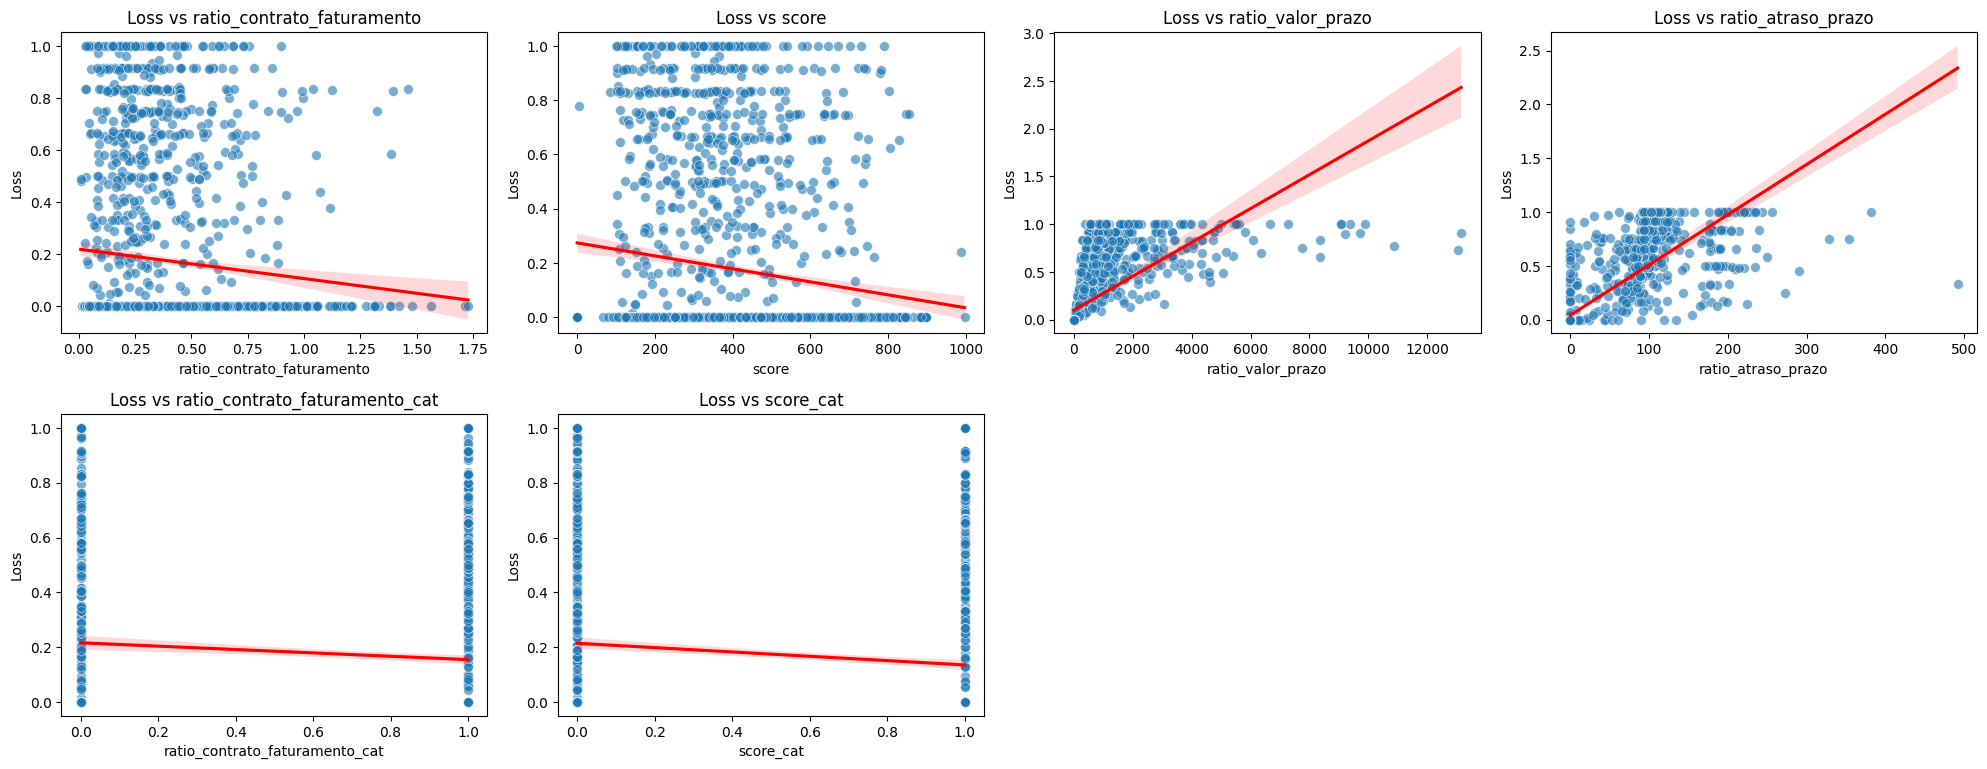

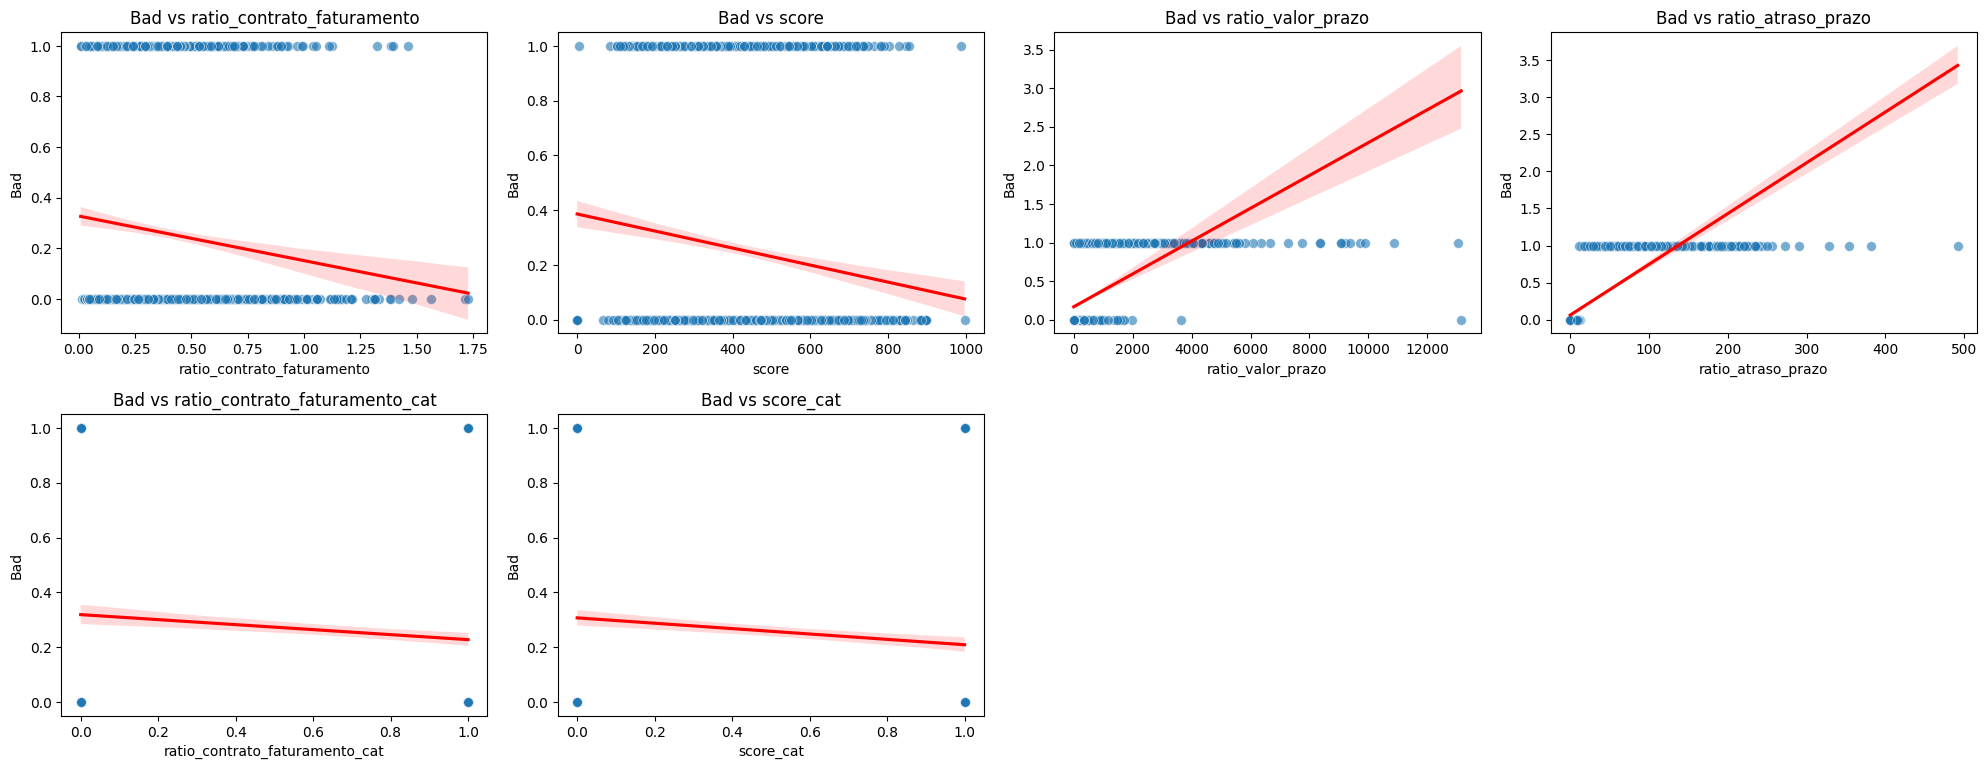

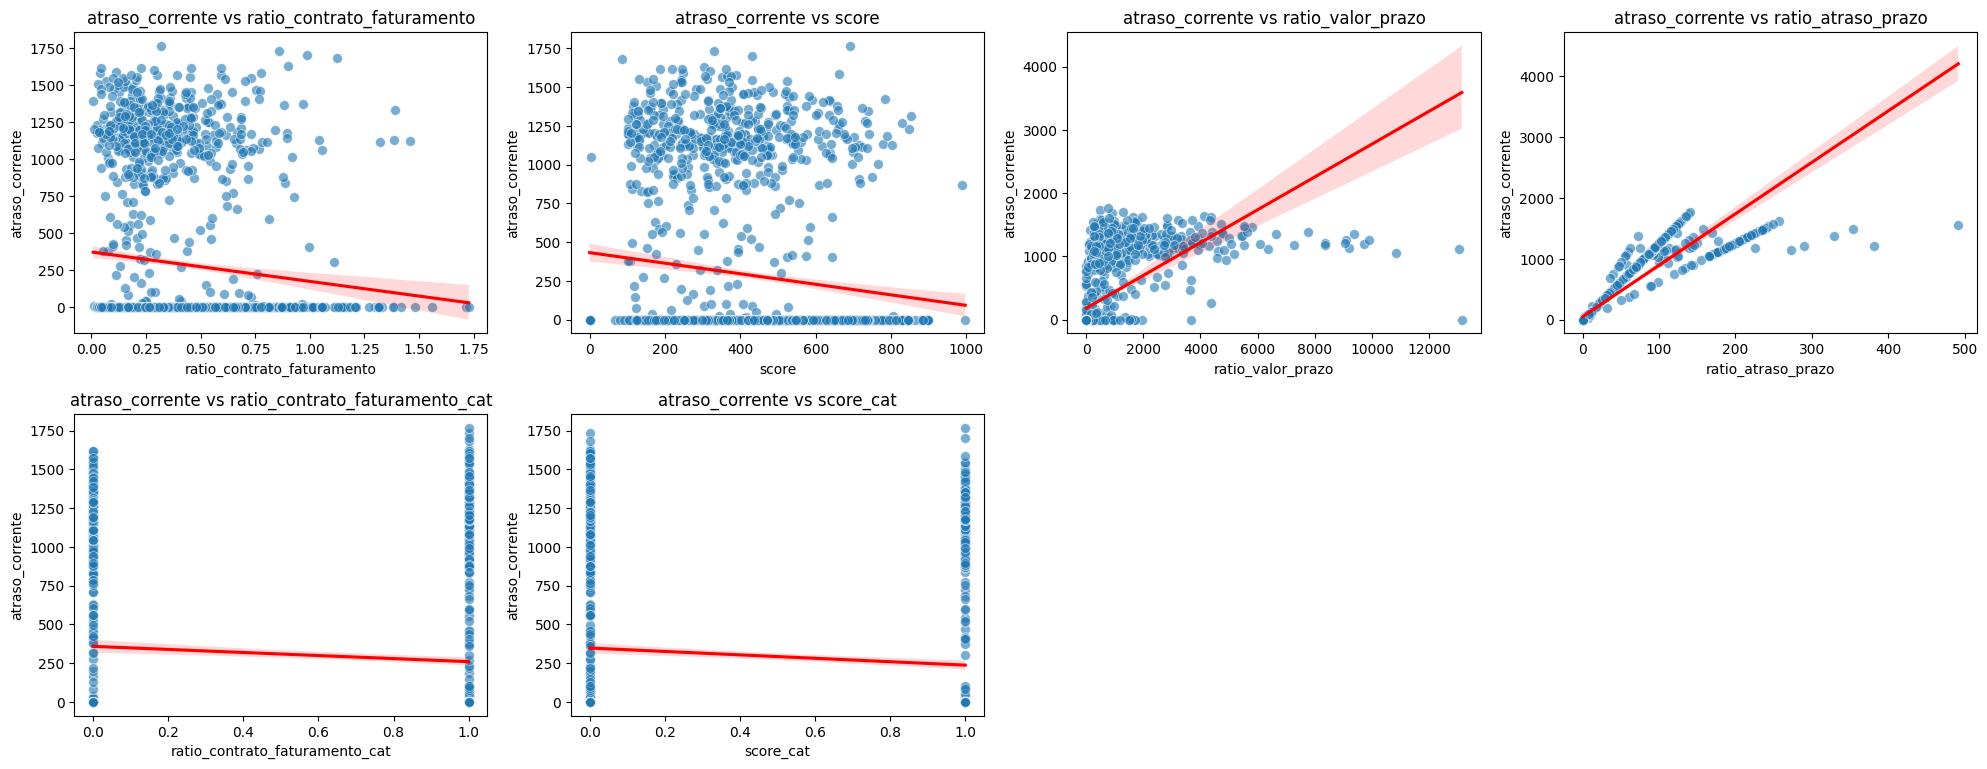

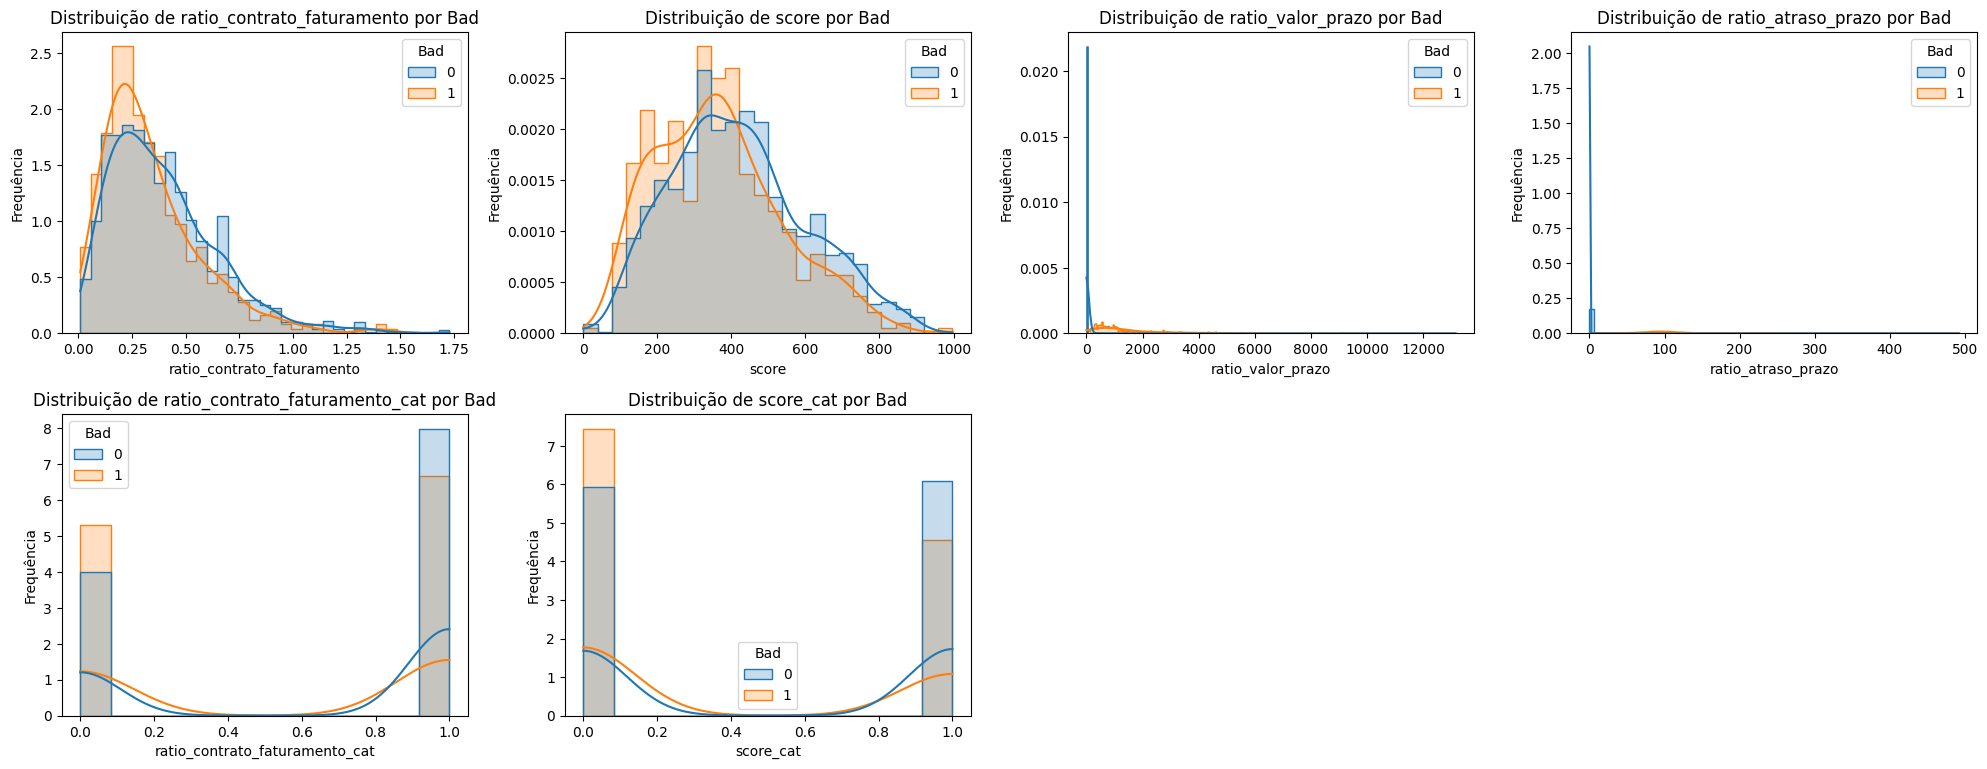

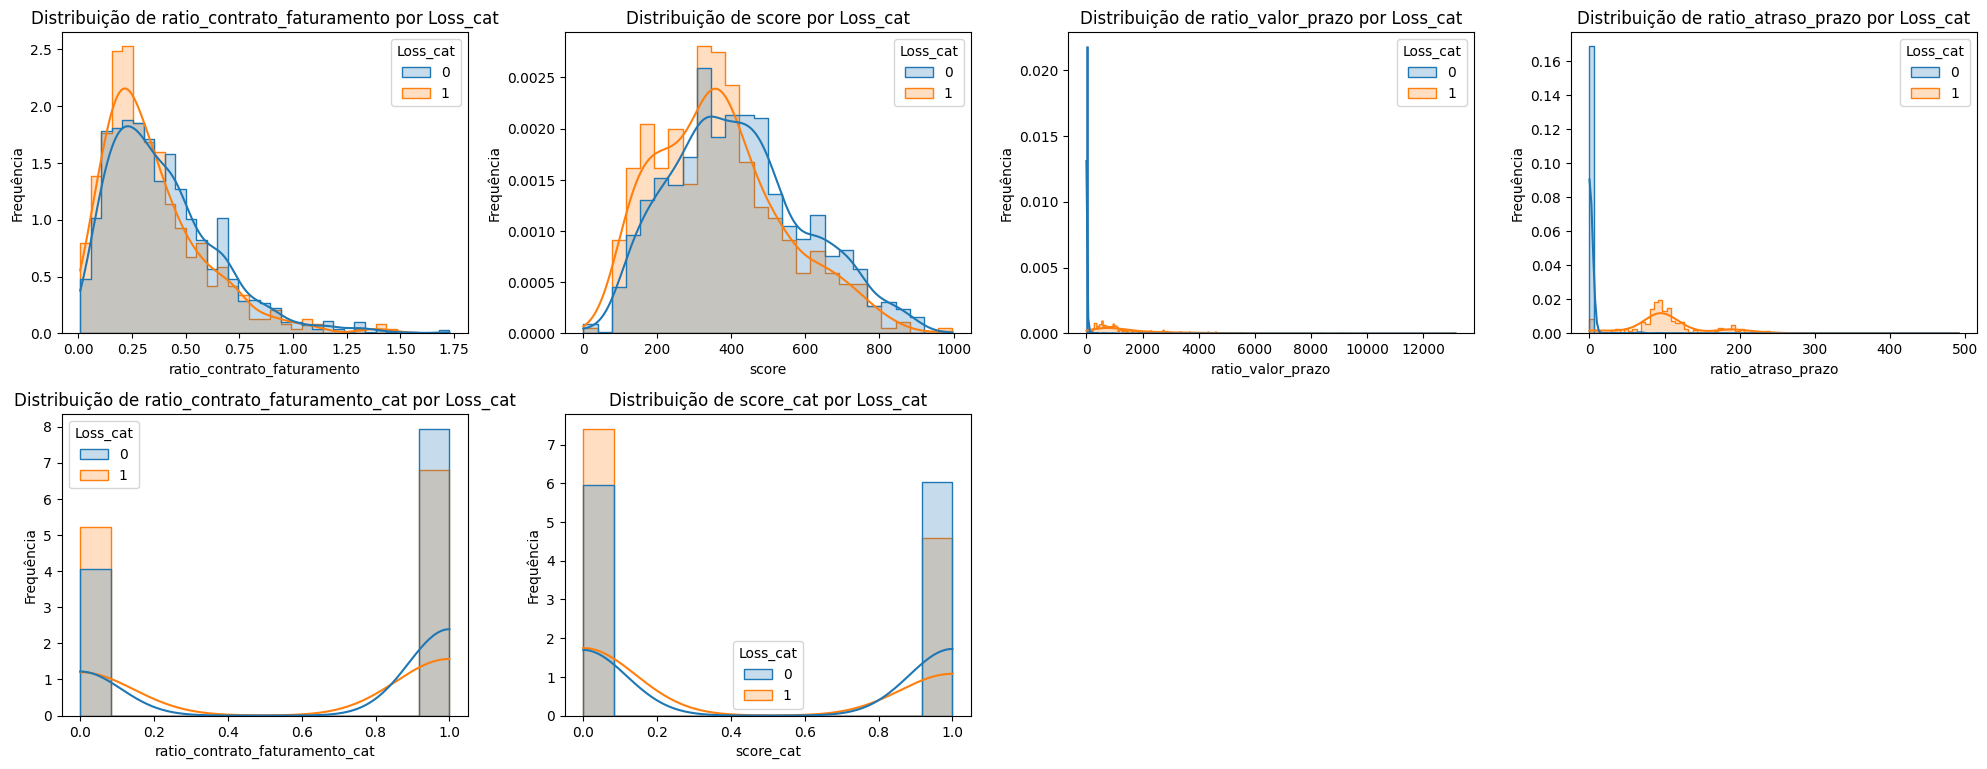

In [23]:
plot_scatter(new_metrics_df, 'Loss', colunas_alvo=['ratio_contrato_faturamento','score','ratio_valor_prazo','ratio_atraso_prazo','ratio_contrato_faturamento_cat','score_cat'])
plot_scatter(new_metrics_df, 'Bad', colunas_alvo=['ratio_contrato_faturamento','score','ratio_valor_prazo','ratio_atraso_prazo','ratio_contrato_faturamento_cat','score_cat'])
plot_scatter(new_metrics_df, 'atraso_corrente', colunas_alvo=['ratio_contrato_faturamento','score','ratio_valor_prazo','ratio_atraso_prazo','ratio_contrato_faturamento_cat','score_cat'])
plot_histograma(new_metrics_df, 'Bad', colunas_numericas=['ratio_contrato_faturamento','score','ratio_valor_prazo','ratio_atraso_prazo','ratio_contrato_faturamento_cat','score_cat'])
plot_histograma(new_metrics_df, 'Loss_cat', colunas_numericas=['ratio_contrato_faturamento','score','ratio_valor_prazo','ratio_atraso_prazo','ratio_contrato_faturamento_cat','score_cat'])